In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# Loading Dataset and EDA

In [2]:
train_df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

train_df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0

In [4]:
train_df.isna().sum()

MachineID                               0
ProductName                             0
EngineVersion                           0
AppVersion                              0
SignatureVersion                        0
IsBetaUser                              0
RealTimeProtectionState                66
IsPassiveModeEnabled                    0
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
HasTpm                                  0
CountryID                               0
CityID                                623
GeoRegionID                             0
LocaleEnglishNameID                     0
PlatformType                            0
Processor                               0
OSVersion                               0
OSBuildNumber                           0
OSProductSuite                          0
OsPlatformSubRelease                    0
OSBuildLab                              0
SKUEditionName                    

In [5]:
y = train_df.target
X = train_df.drop(['target'], axis=1)

## Understanding Target Distribution

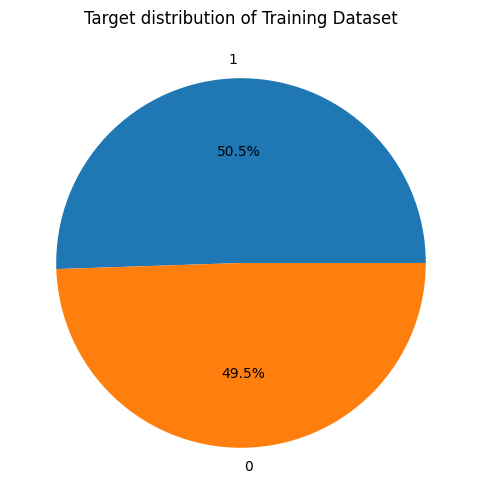

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
target_dist = y.value_counts()
plt.pie(target_dist, labels=target_dist.index, autopct='%1.1f%%')
plt.title('Target distribution of Training Dataset')
plt.show()

### The Target is balanced, since there are approximately equal instances of positive and negative malware detection

# Univariate and Bivariate Analysis

In [7]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [8]:
pd.options.display.float_format = '{:.5f}'.format

numeric_correlation = X[numerical_cols].corrwith(y)
numeric_std_dev = X[numerical_cols].std().round(5)

print("Correlation between numerical features and target:")

numerical_features_info = pd.DataFrame({
    'Number of Unique Values': [X[col].nunique() for col in numerical_cols],
    'Number of Missing Values': [X[col].isnull().sum() for col in numerical_cols],
    'Internal Standard Deviation': numeric_std_dev.values,
    'Correlation with Target': numeric_correlation.values,
}, index=numerical_cols)

print(numerical_features_info.sort_values(by=['Correlation with Target', 'Number of Unique Values'], ascending=True, na_position='first'))

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between numerical features and target:
                                    Number of Unique Values  \
IsBetaUser                                                1   
AutoSampleSubmissionEnabled                               1   
IsFlightsDisabled                                         1   
NumAntivirusProductsInstalled                             5   
IsAlwaysOnAlwaysConnectedCapable                          2   
IsTouchEnabled                                            2   
IsPassiveModeEnabled                                      2   
NumAntivirusProductsEnabled                               5   
IsVirtualDevice                                           2   
FirmwareManufacturerID                                  169   
OSProductSuite                                            7   
IsPenCapable                                              2   
RegionIdentifier                                         15   
SMode                                                     2   
OEMN

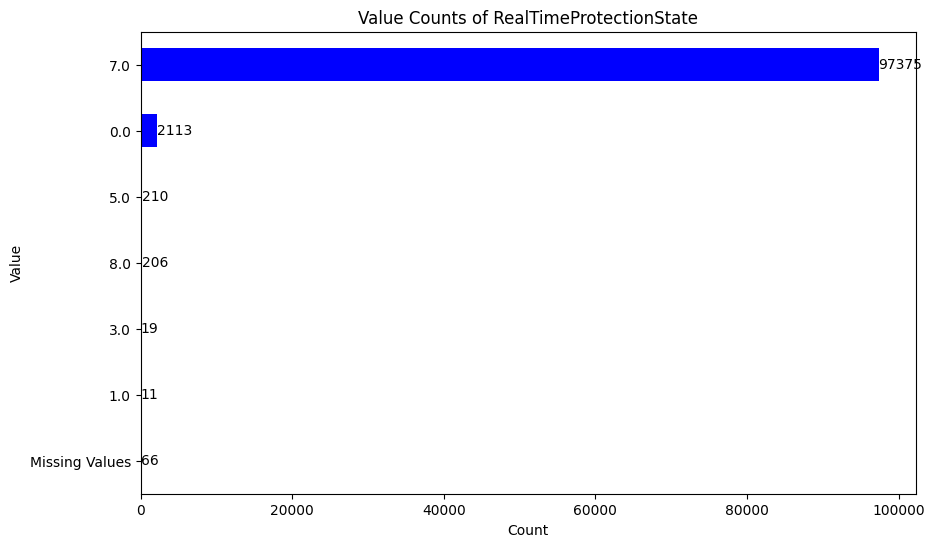

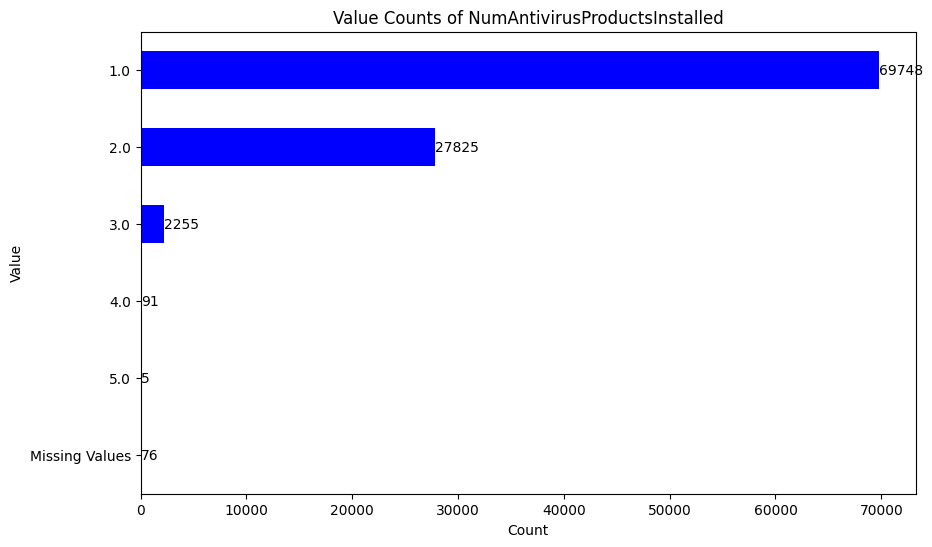

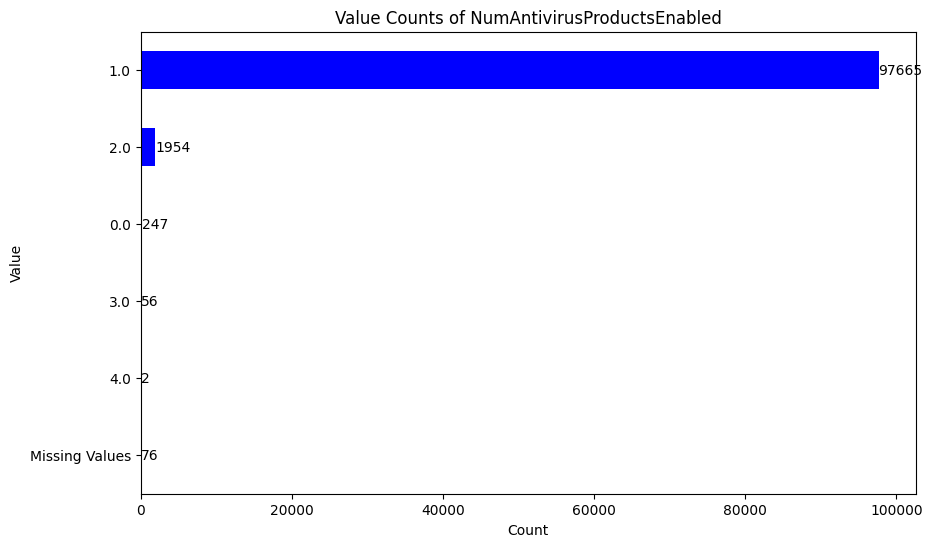

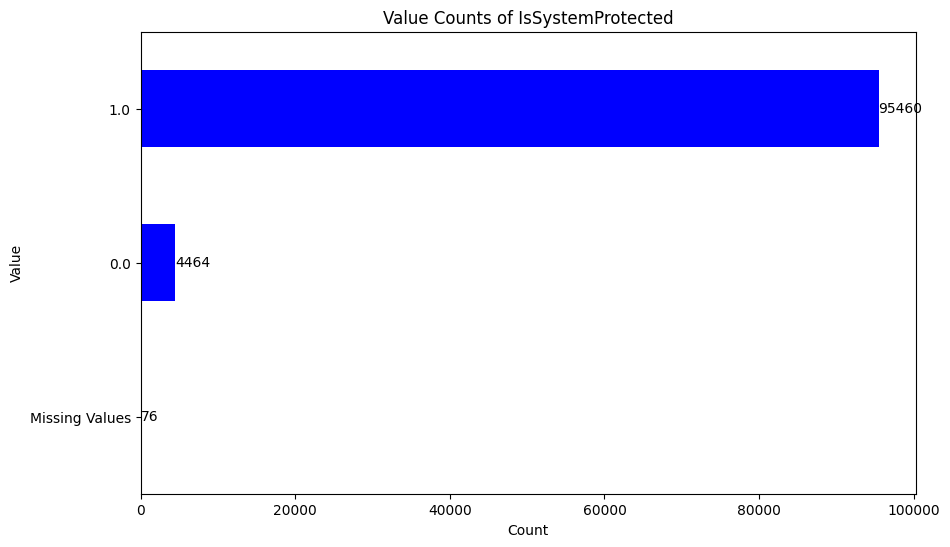

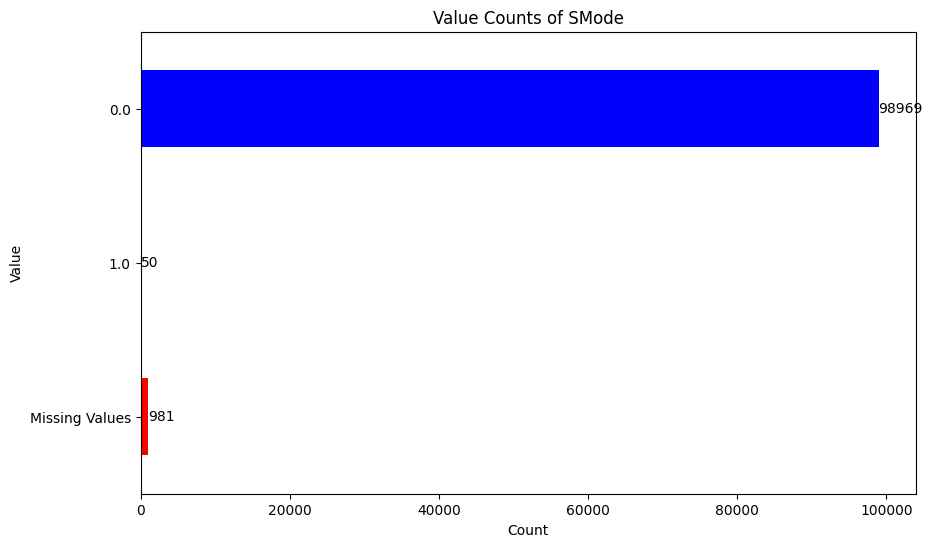

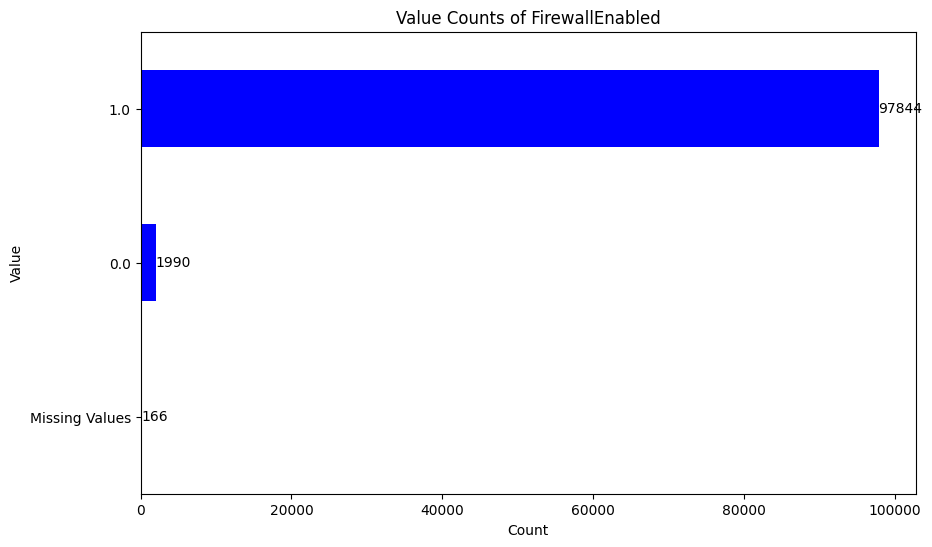

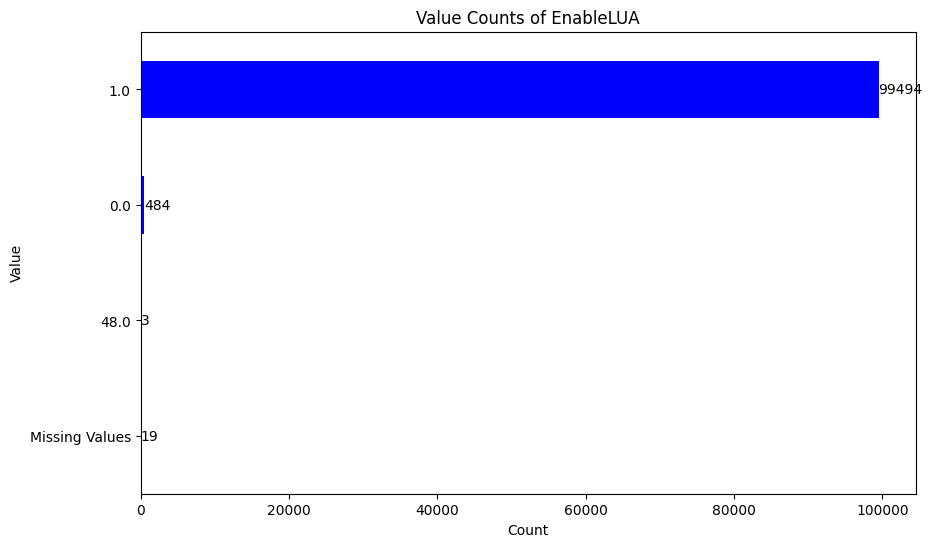

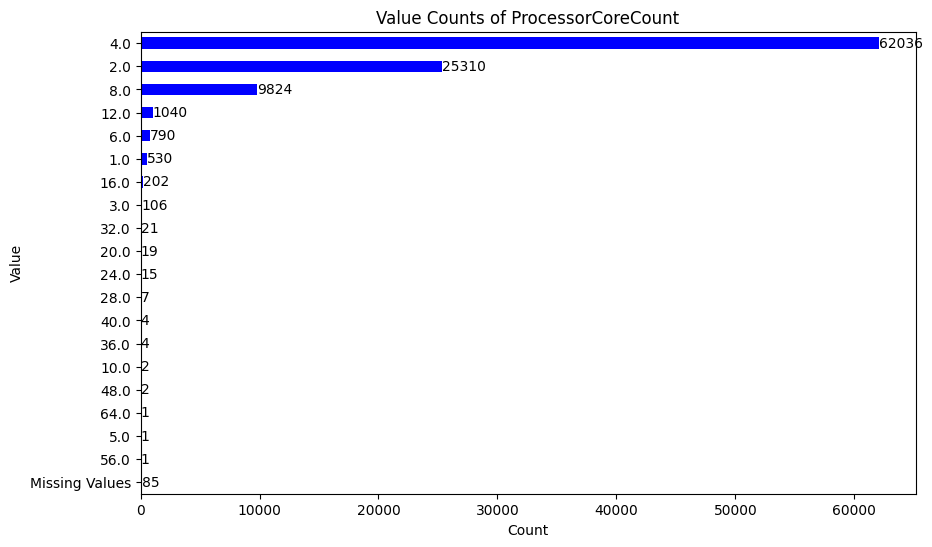

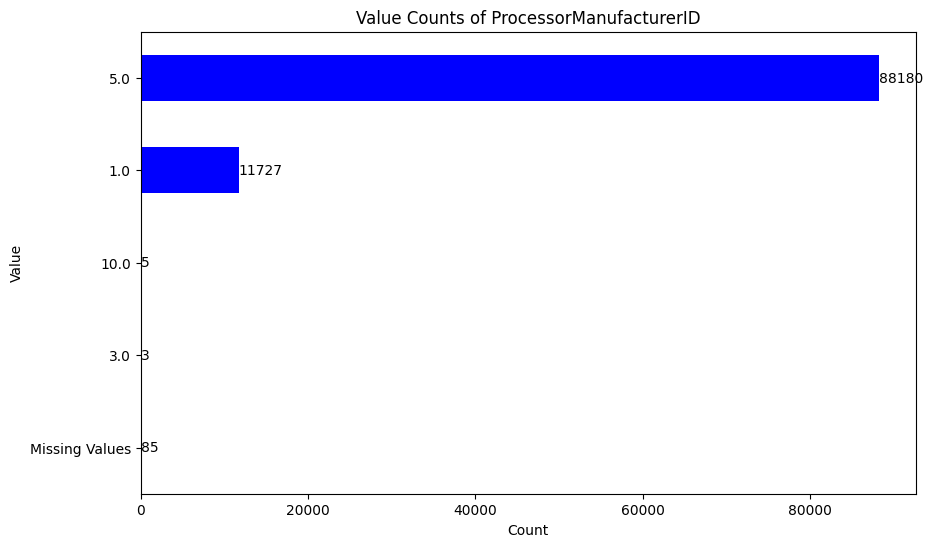

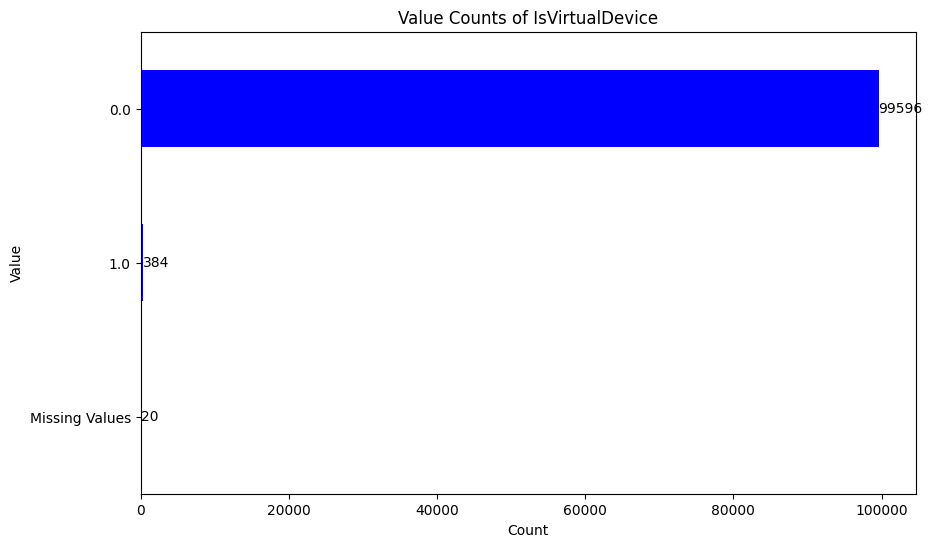

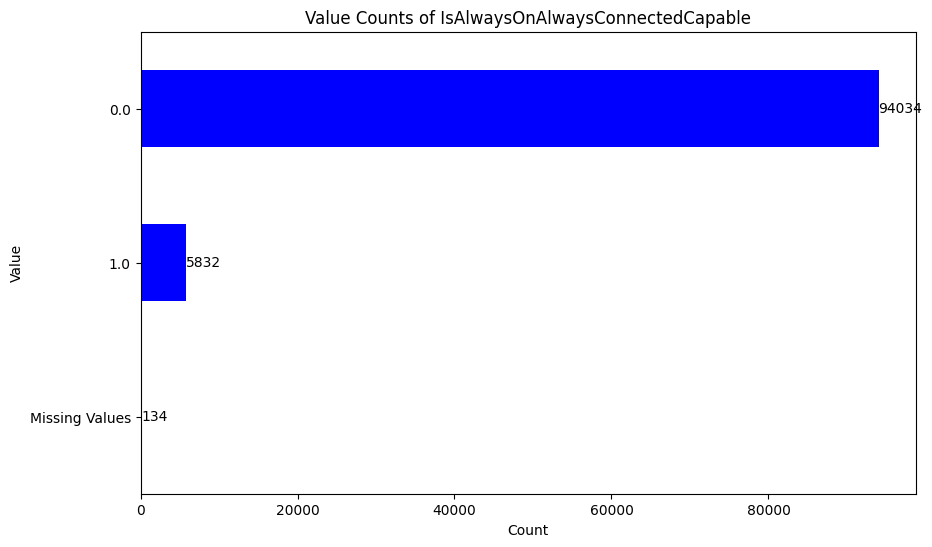

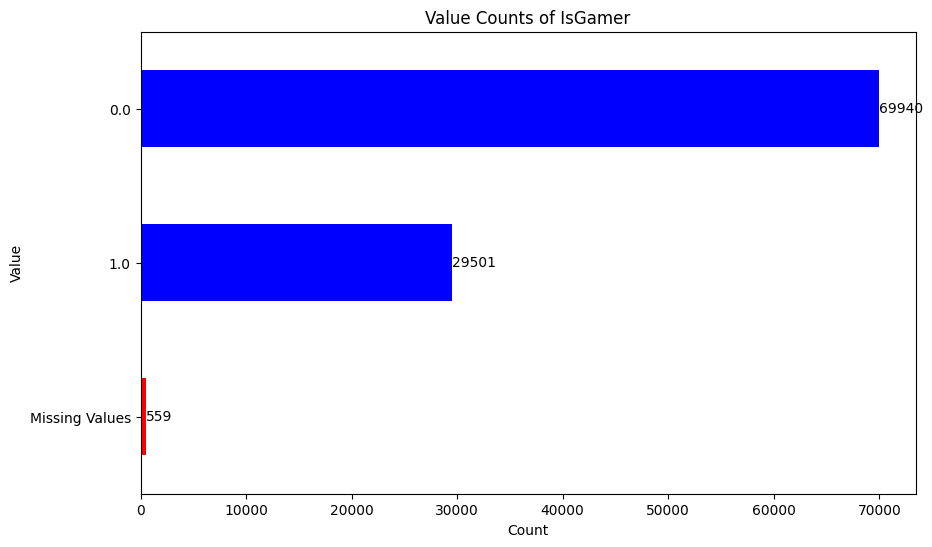

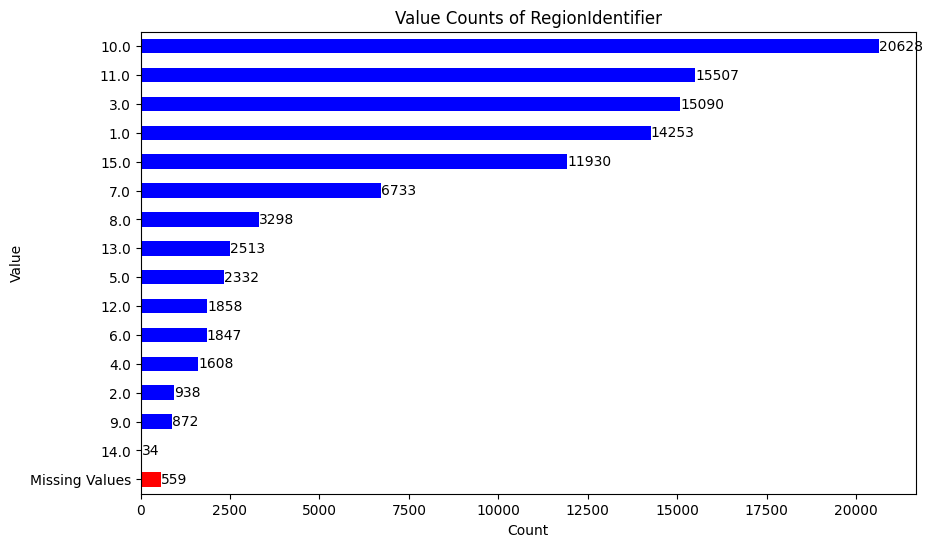

In [9]:
filtered_num_features = [col for col in numerical_cols if X[col].nunique() > 1 and X[col].nunique() <= 20 and X[col].isnull().sum() > 0]

for feature in filtered_num_features:
    value_counts = X[feature].value_counts().sort_values(ascending=False)
    missing_values_count = X[feature].isnull().sum()
    
    value_counts_with_missing = pd.concat([value_counts, pd.Series(missing_values_count, index=['Missing Values'])])
    
    plt.figure(figsize=(10, 6))
    bars = value_counts_with_missing.plot(kind='barh', color=['red' if idx == 'Missing Values' else 'blue' for idx in value_counts_with_missing.index])
    plt.title(f'Value Counts of {feature}')
    plt.xlabel('Count')
    plt.ylabel('Value')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
    for index, value in enumerate(value_counts_with_missing):
        plt.text(value, index, str(value), va='center')
    plt.show()

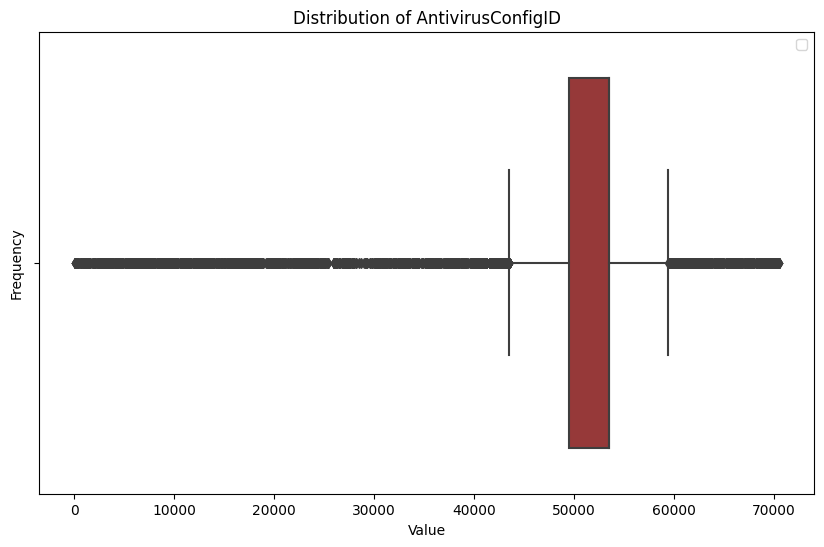

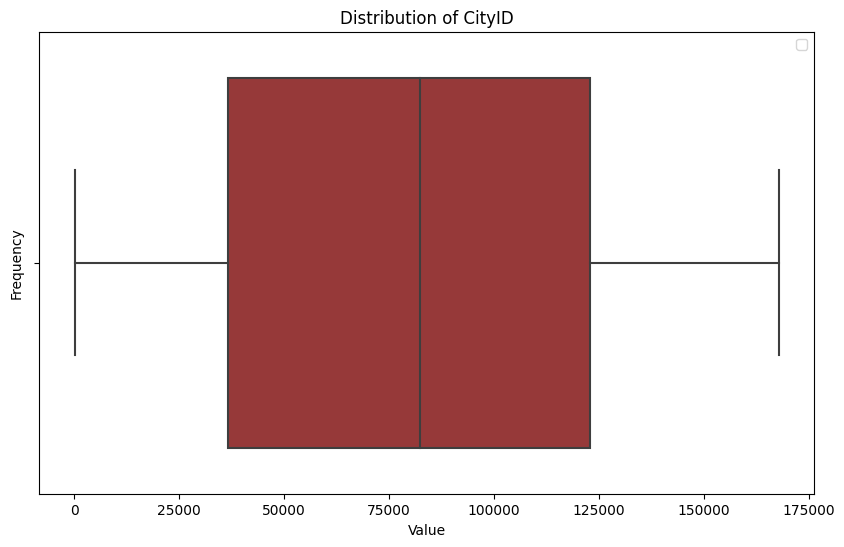

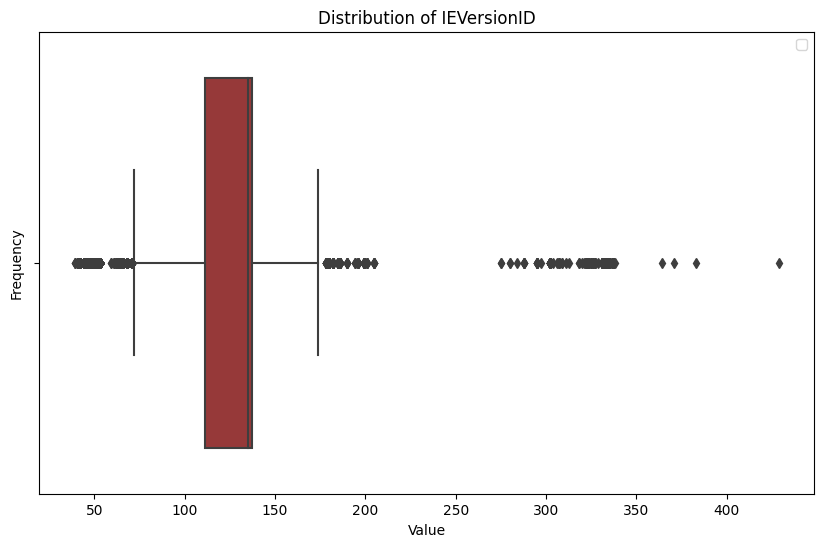

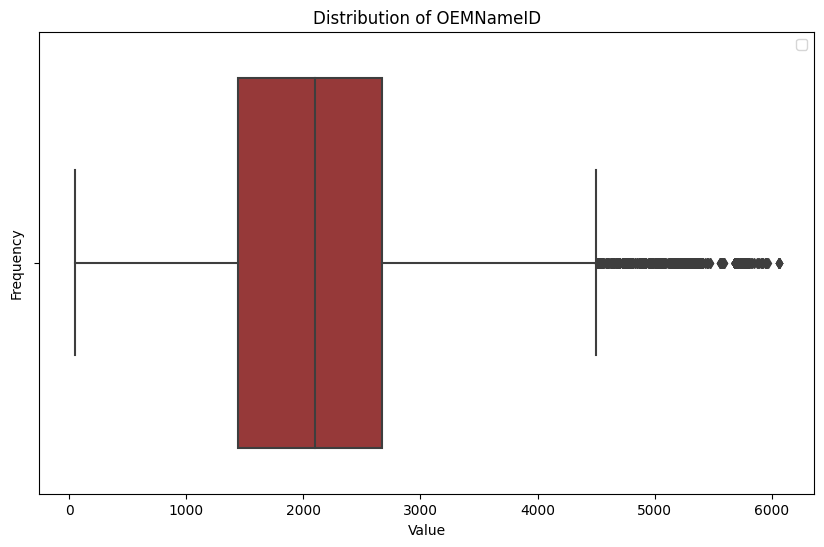

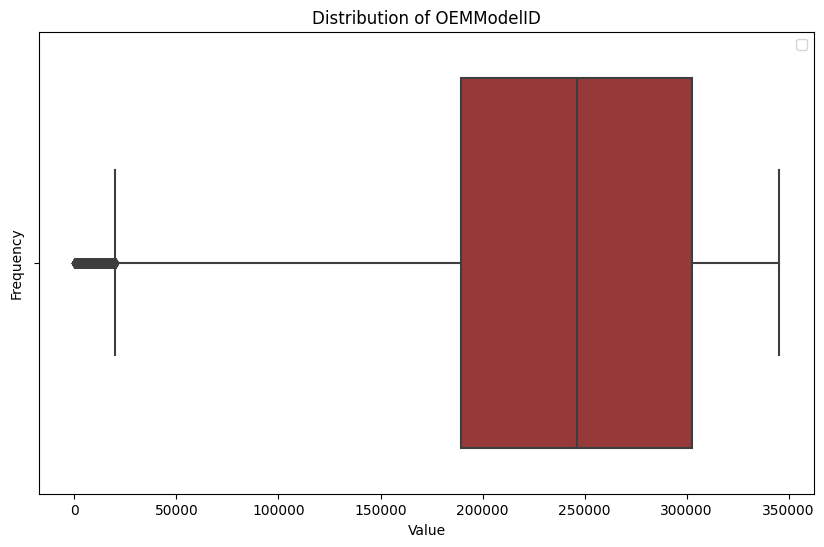

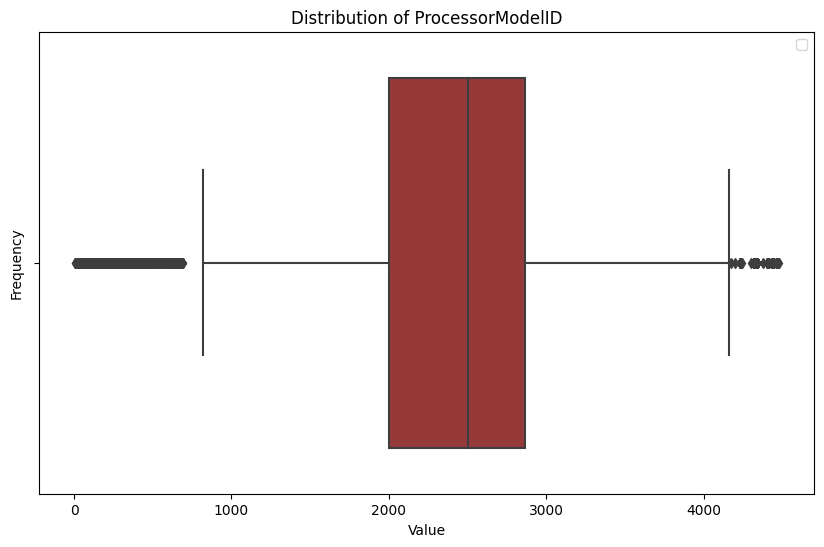

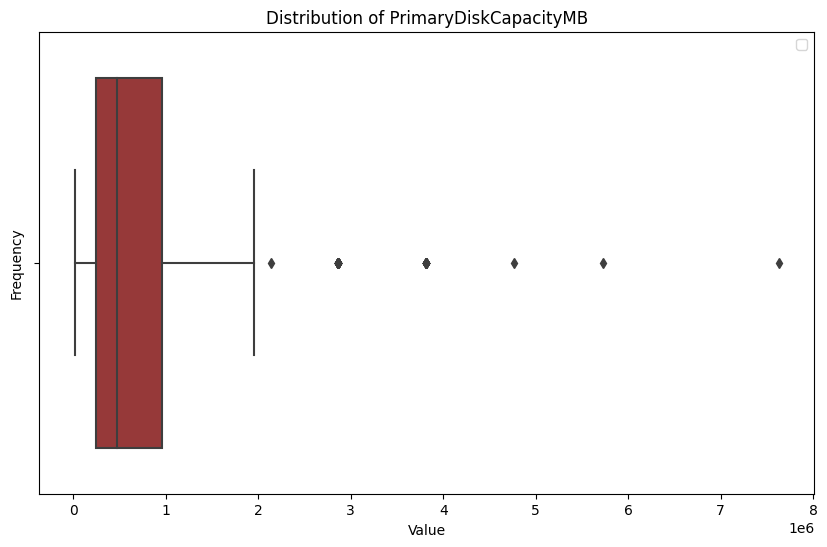

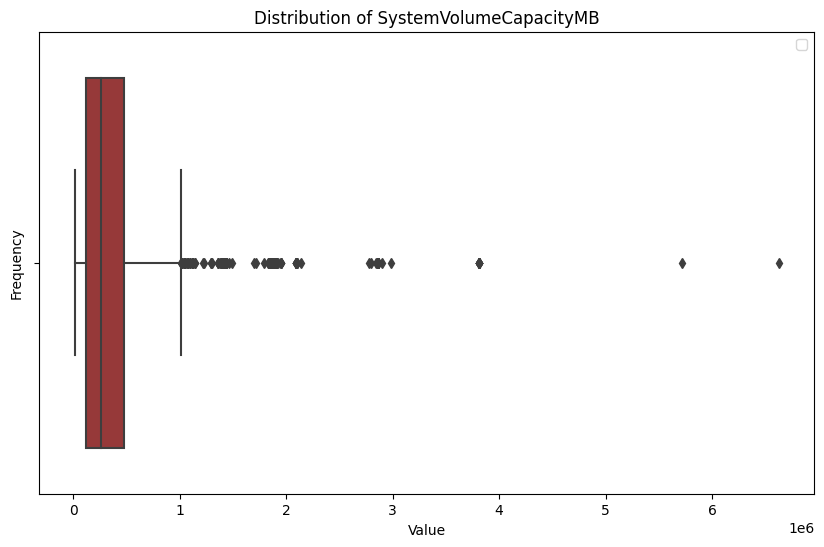

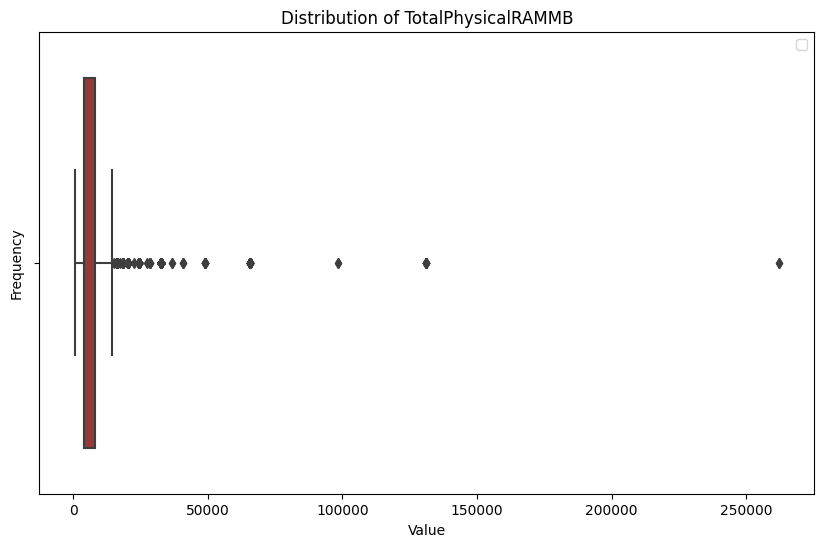

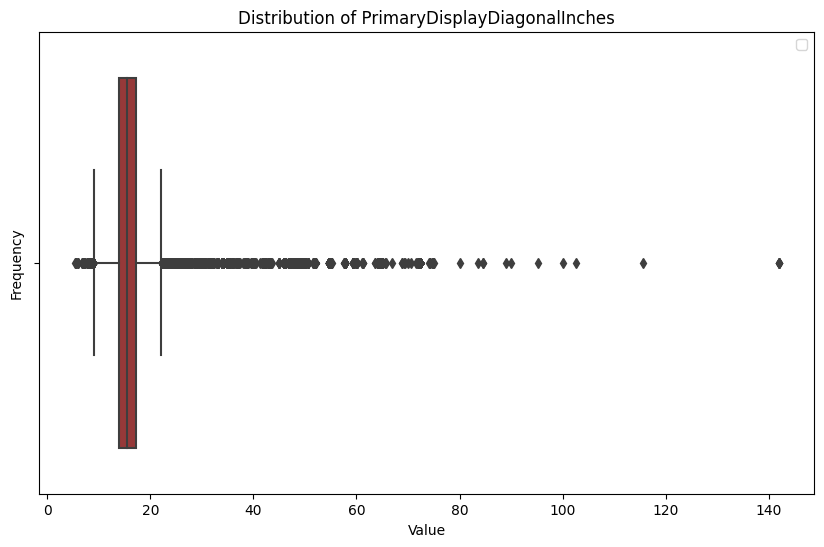

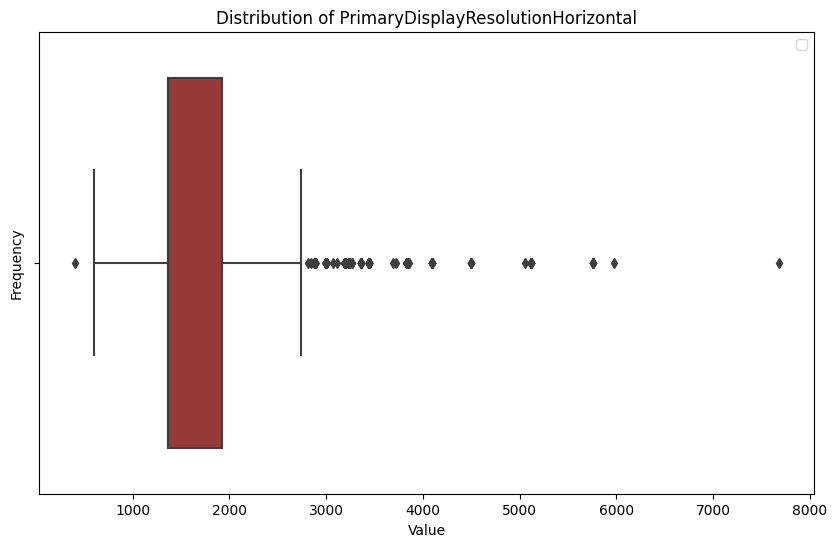

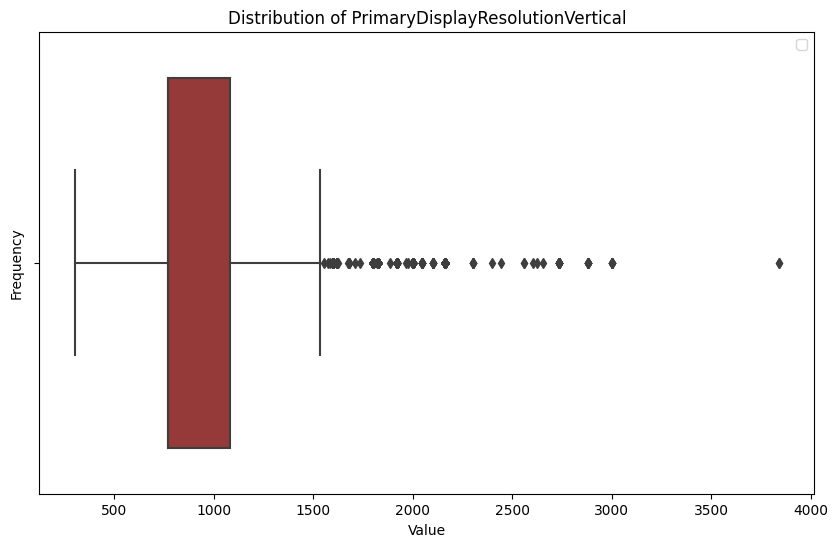

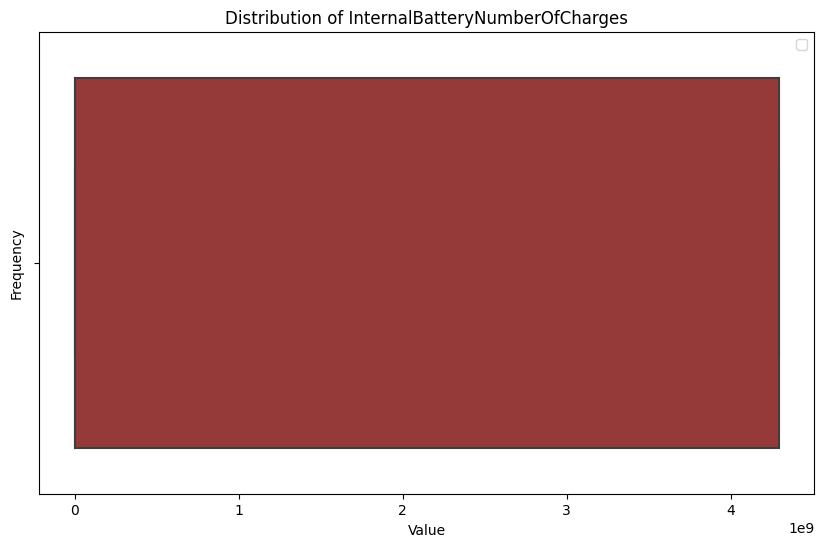

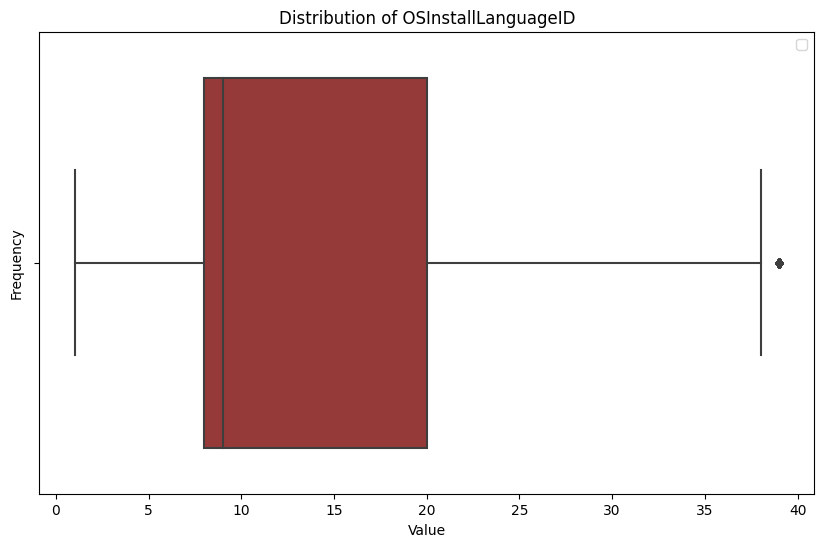

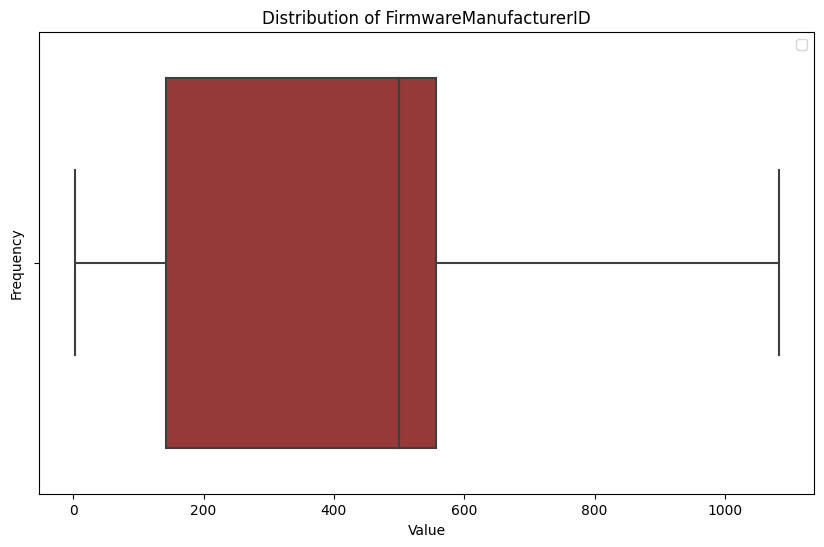

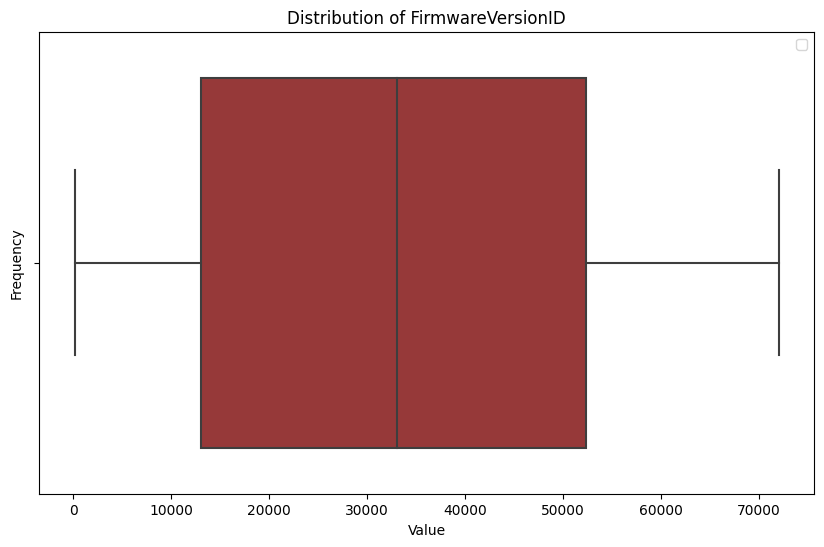

In [10]:
import seaborn as sns

filtered_features = [col for col in numerical_cols if X[col].nunique() > 20 and X[col].isnull().sum() > 0]

for feature in filtered_features:
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(x=X[feature].dropna(), color='brown')
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.show()

## List of numerical features to drop

We are dropping the features which have non existing correlation with target or whose correlation is less than 0.01

In [11]:
columns_to_drop = numeric_correlation[(numeric_correlation.isna()) | (numeric_correlation.between(-0.01, 0.01))].index.tolist()

print(columns_to_drop)

['IsBetaUser', 'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'AutoSampleSubmissionEnabled', 'EnableLUA', 'OEMModelID', 'ProcessorManufacturerID', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'IsPortableOS', 'IsFlightsDisabled', 'FirmwareVersionID', 'IsSecureBootEnabled']


## Calculating correlation of categorical features

In [12]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_values = {}
cat_col_std_dev = {}
for col in categorical_cols:
    confusion_matrix = pd.crosstab(X[col], y)
    cramers_v_values[col] = cramers_v(confusion_matrix.values)
    value_counts = X[col].value_counts(normalize=True)
    cat_col_std_dev[col] = value_counts.std().round(5)


categorical_cols_info = pd.DataFrame({
    'Number of Unique Values': [X[col].nunique() for col in categorical_cols],
    'Number of Missing Values': [X[col].isnull().sum() for col in categorical_cols],
    'Internal Standard Deviation': [cat_col_std_dev[col] for col in categorical_cols],
    'Correlation with Target': [cramers_v_values[col] for col in categorical_cols]
}, index=categorical_cols)

print(categorical_cols_info.sort_values(by='Correlation with Target', ascending=True))

                          Number of Unique Values  Number of Missing Values  \
FlightRing                                      7                         0   
ProductName                                     2                         0   
OSVersion                                       7                         0   
DeviceFamily                                    2                         0   
PlatformType                                    4                         0   
OSGenuineState                                  4                         0   
SKUEditionName                                  8                         0   
PrimaryDiskType                                 4                        23   
AutoUpdateOptionsName                           6                         0   
MachineID                                   99835                         0   
OSSkuFriendlyName                              18                         0   
OSEdition                                      20   

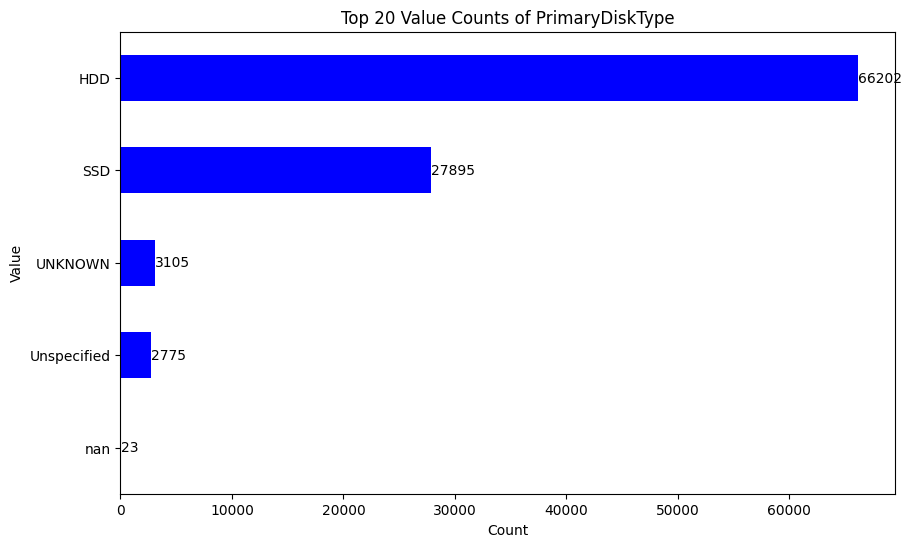

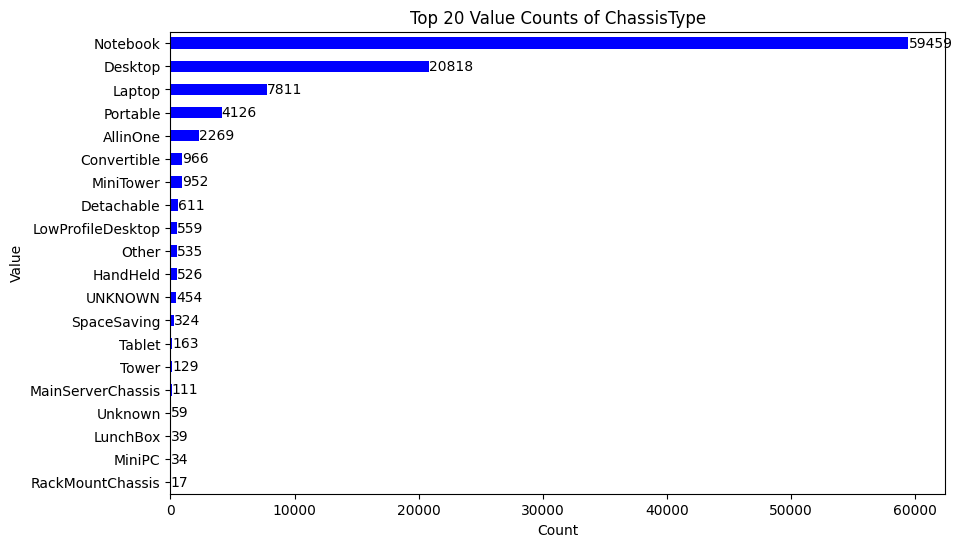

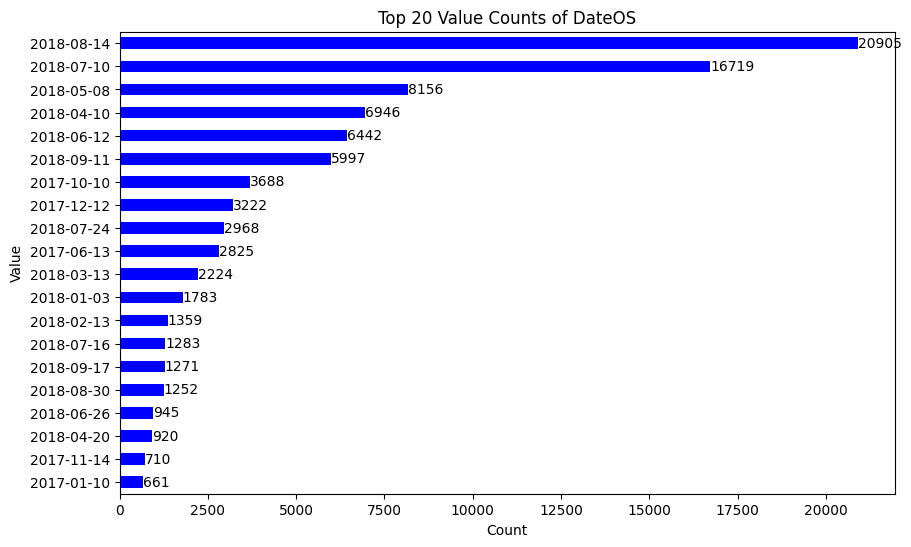

In [13]:
categorical_features_with_missing = [col for col in categorical_cols if X[col].isnull().sum() > 0]

for feature in categorical_features_with_missing:
    value_counts = X[feature].value_counts(dropna=False).sort_values(ascending=False)
    
    top_20_values = value_counts.head(20)
   
    plt.figure(figsize=(10, 6))
    bars = top_20_values.plot(kind='barh', color=['red' if idx == 'Missing Values' else 'blue' for idx in top_20_values.index])
    plt.title(f'Top 20 Value Counts of {feature}')
    plt.xlabel('Count')
    plt.ylabel('Value')
    plt.gca().invert_yaxis()
    
    for index, value in enumerate(top_20_values):
        plt.text(value, index, str(value), va='center')
    
    plt.show()

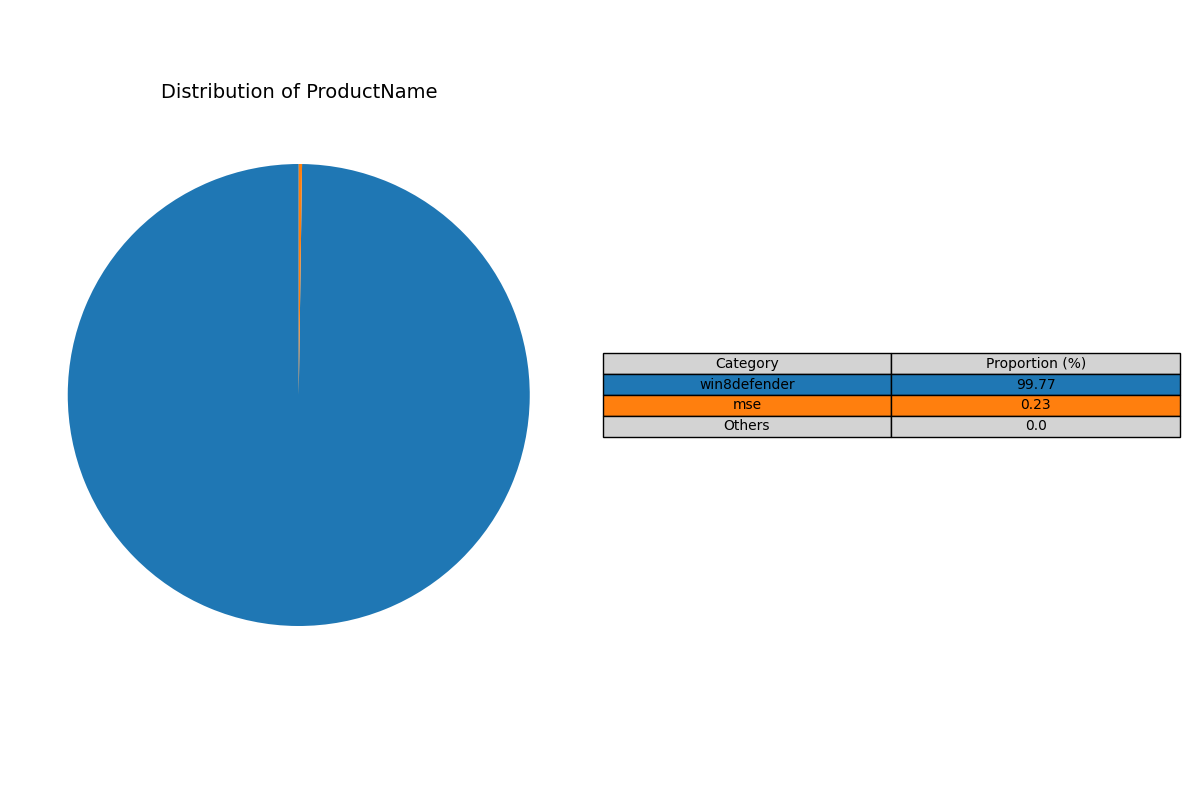

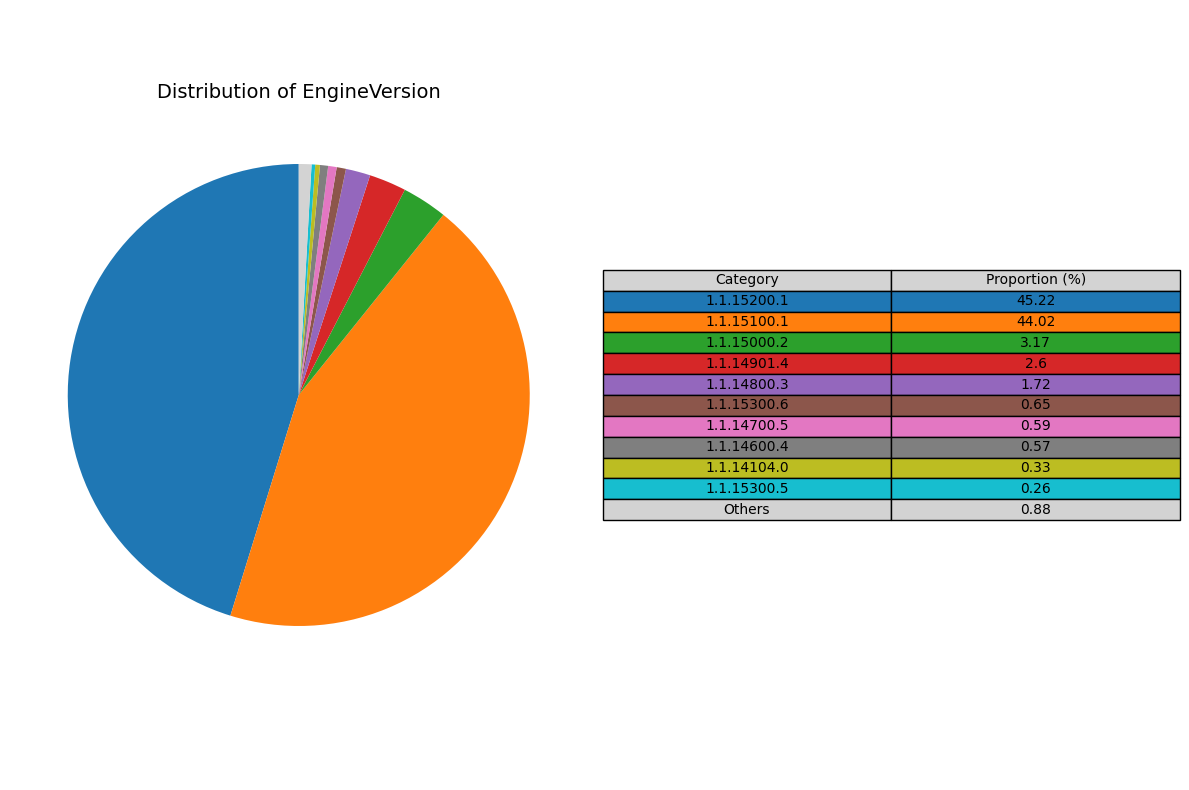

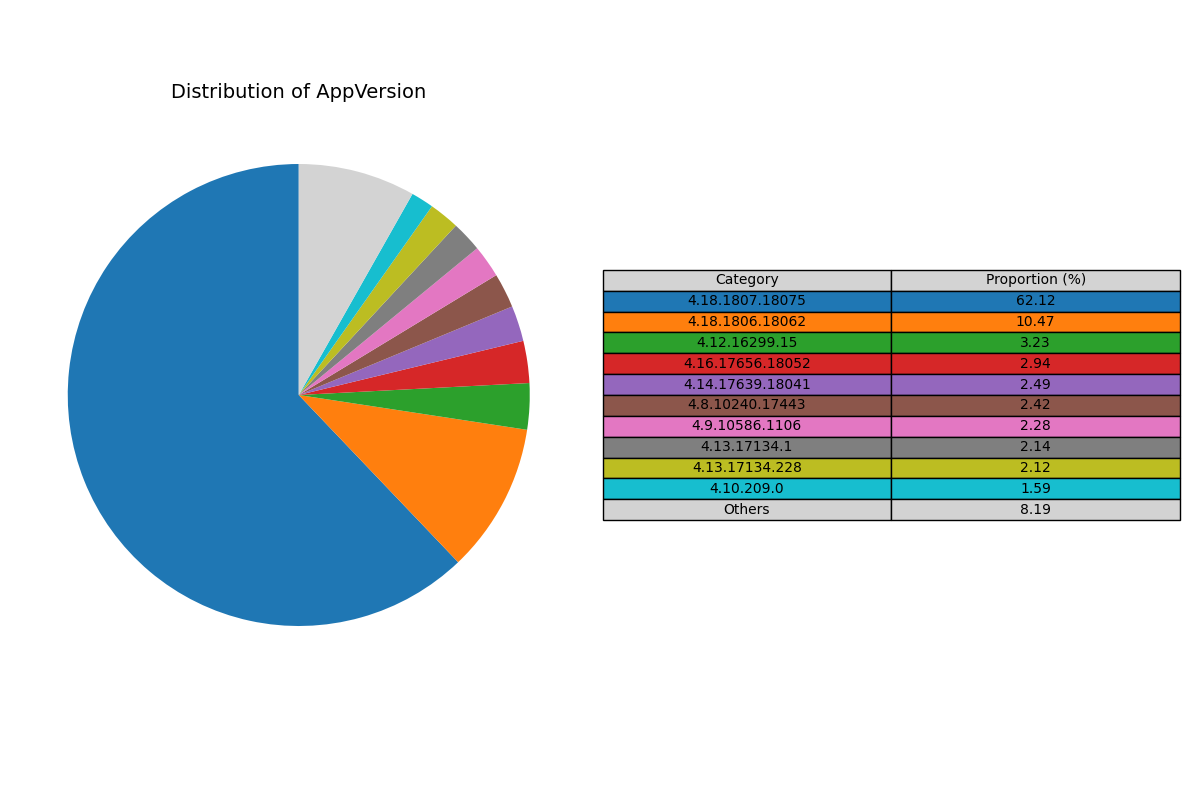

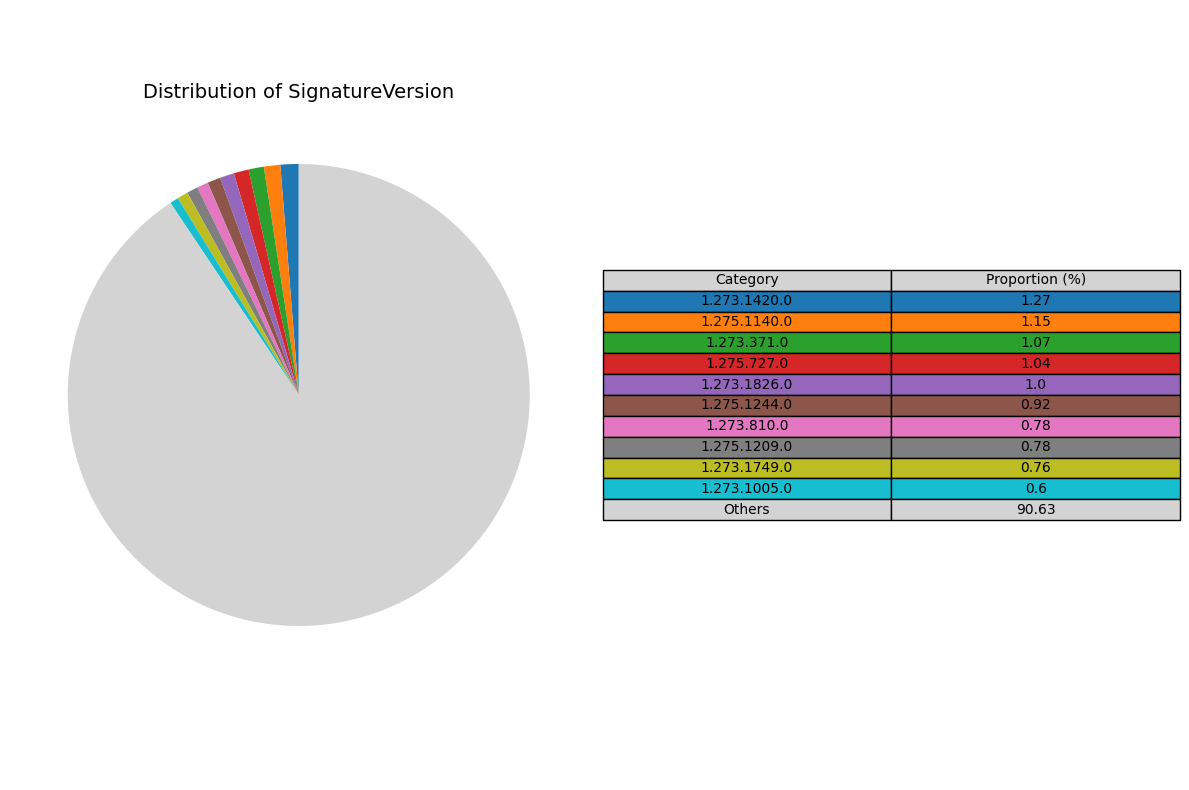

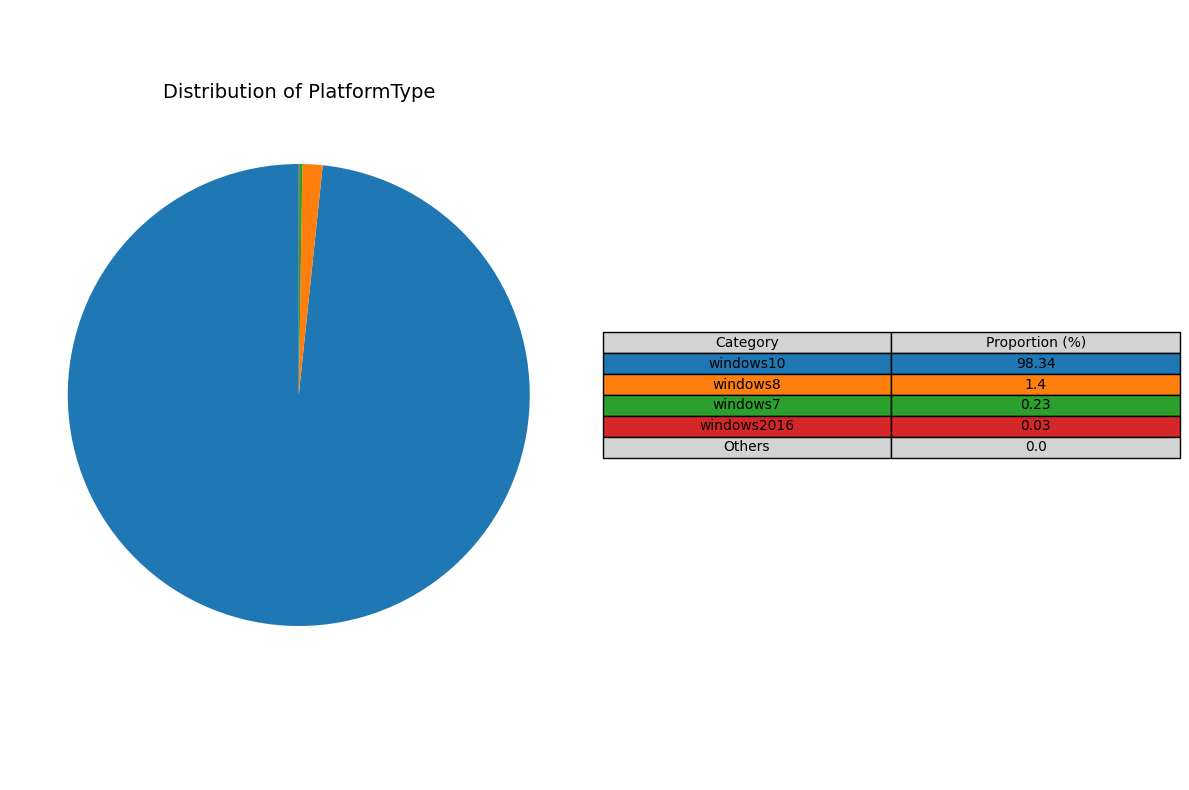

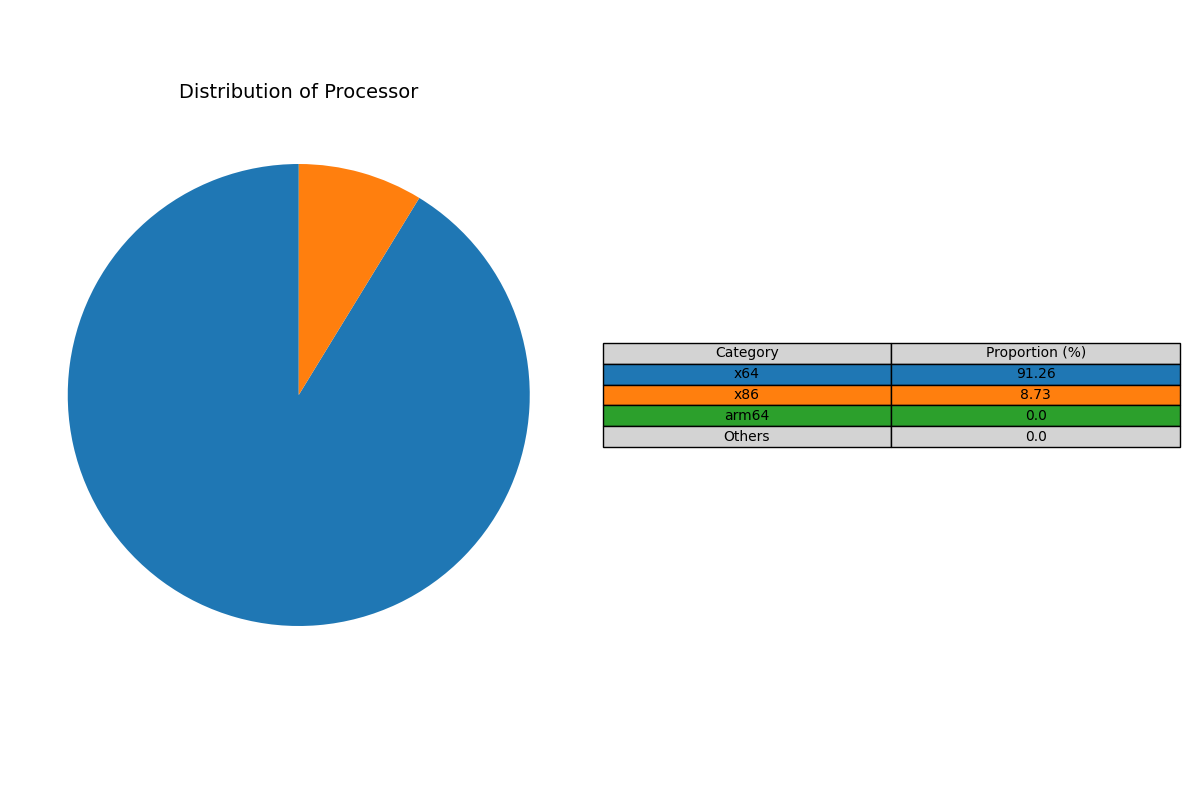

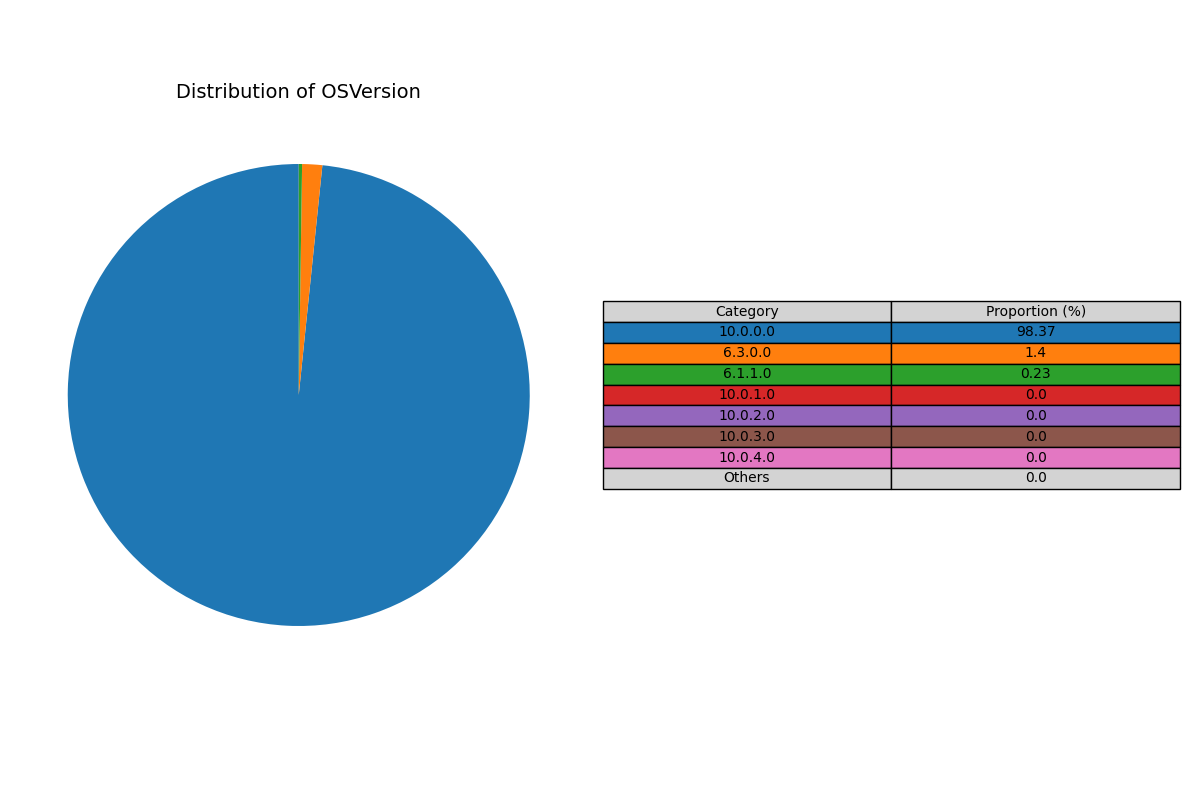

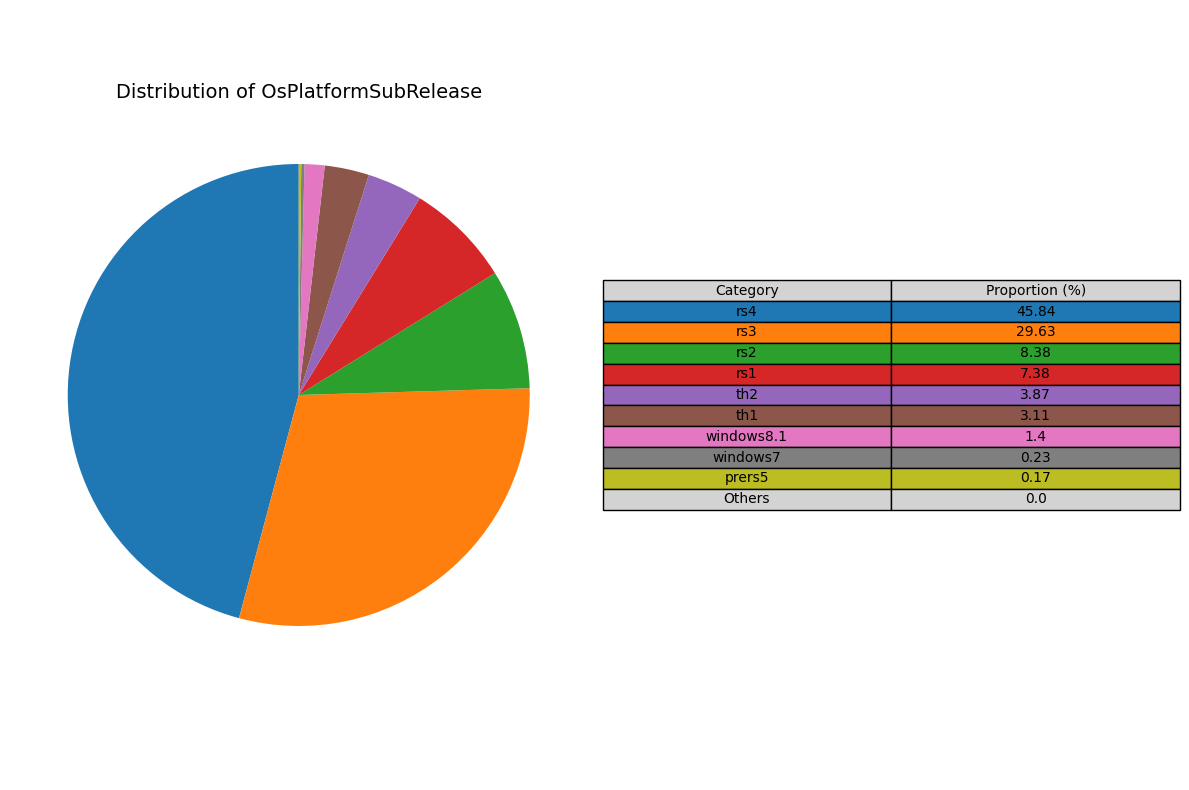

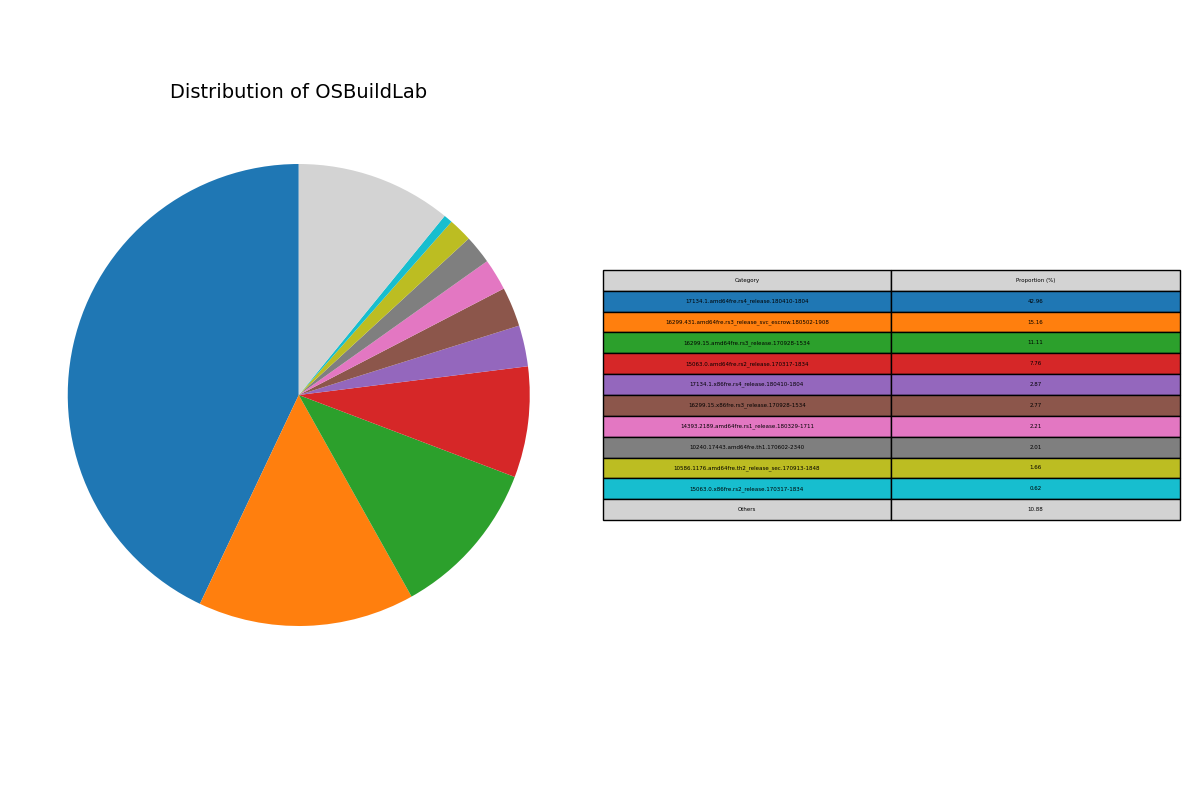

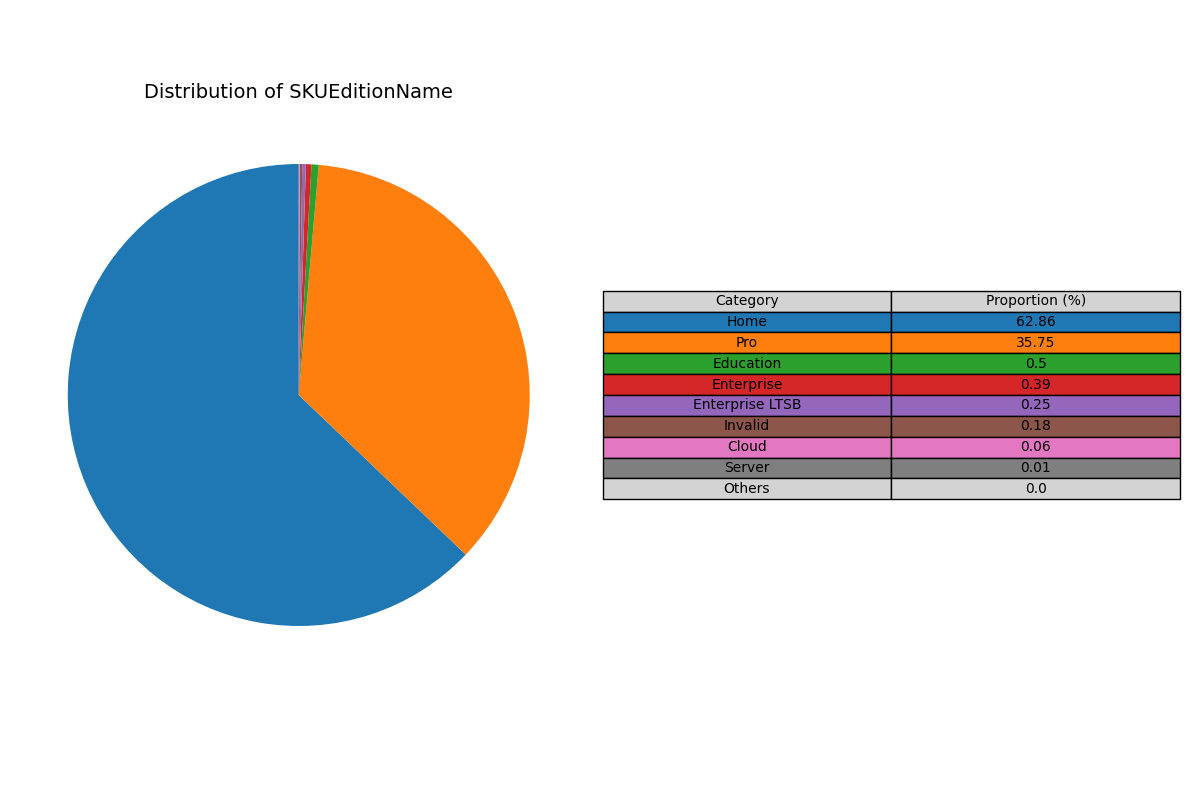

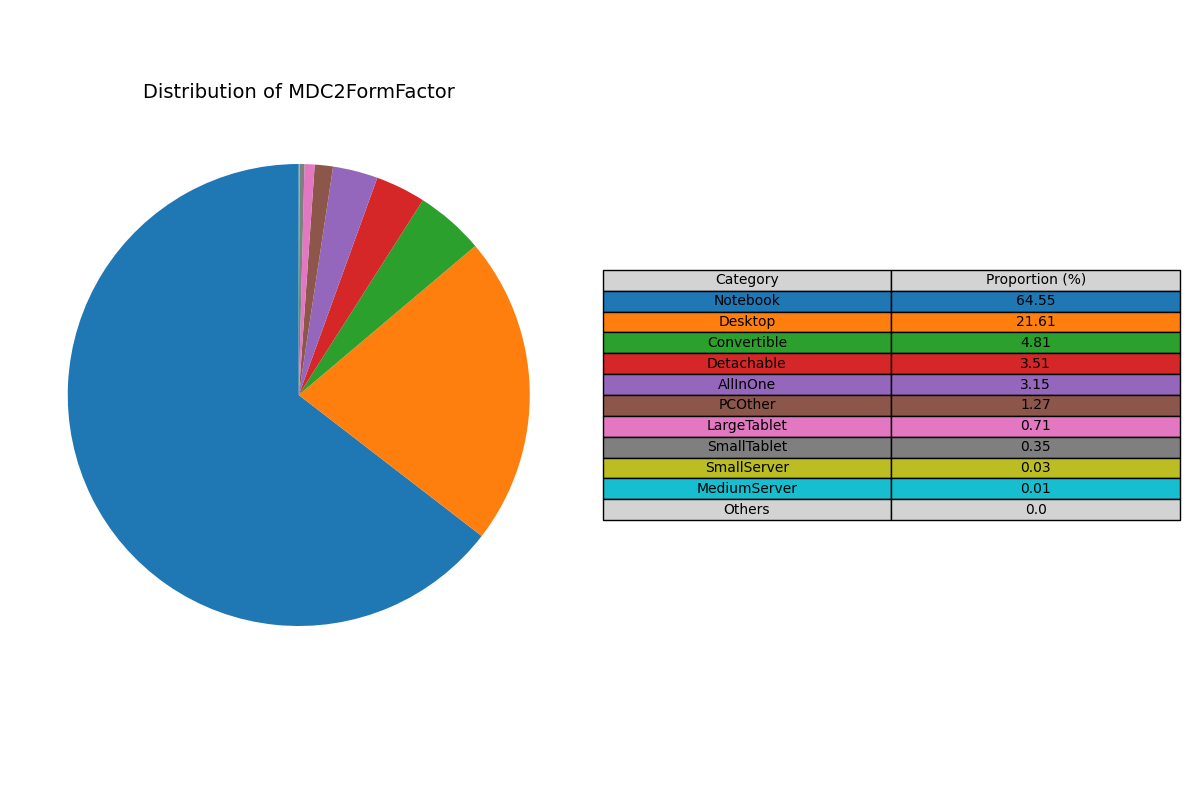

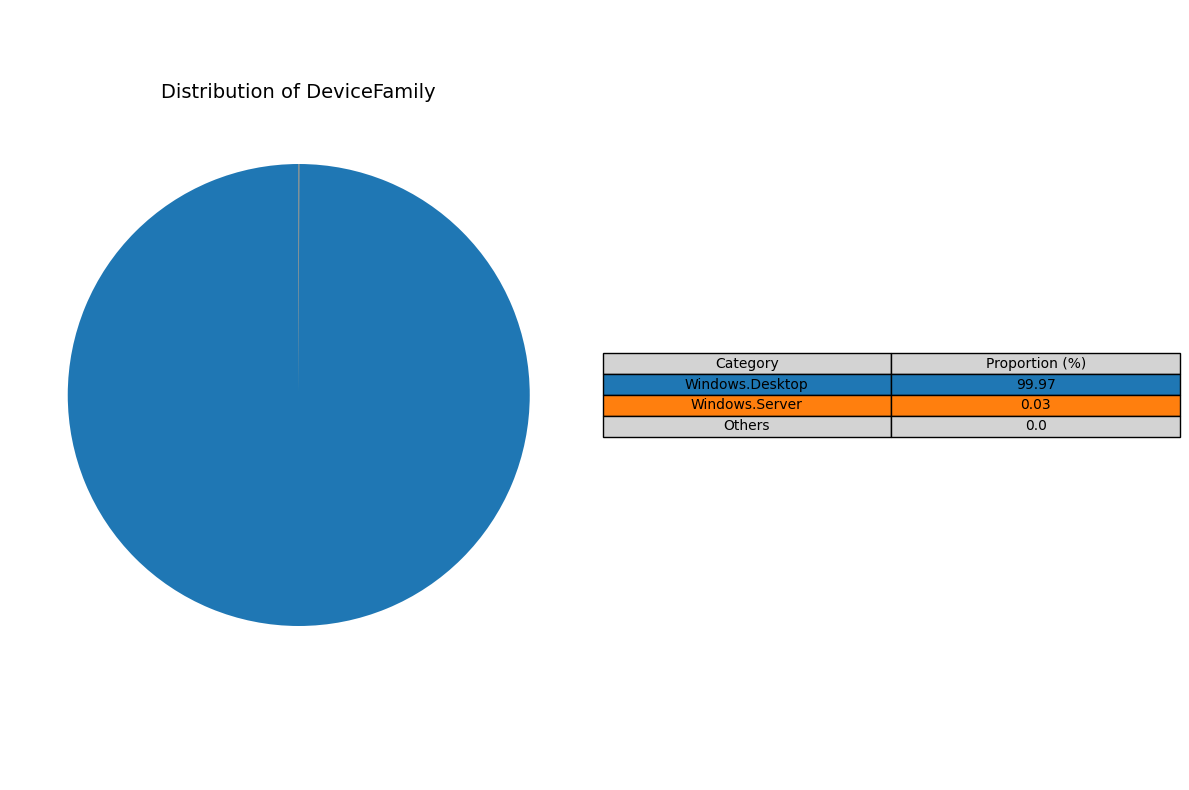

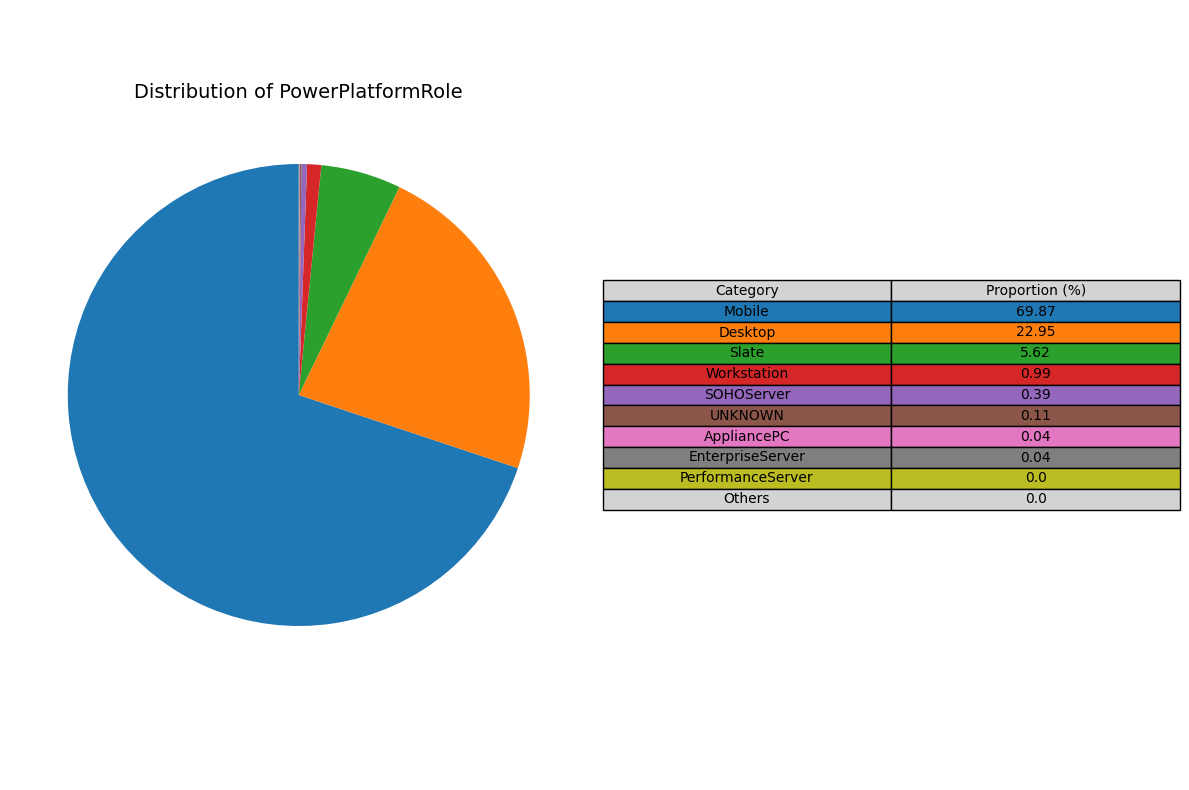

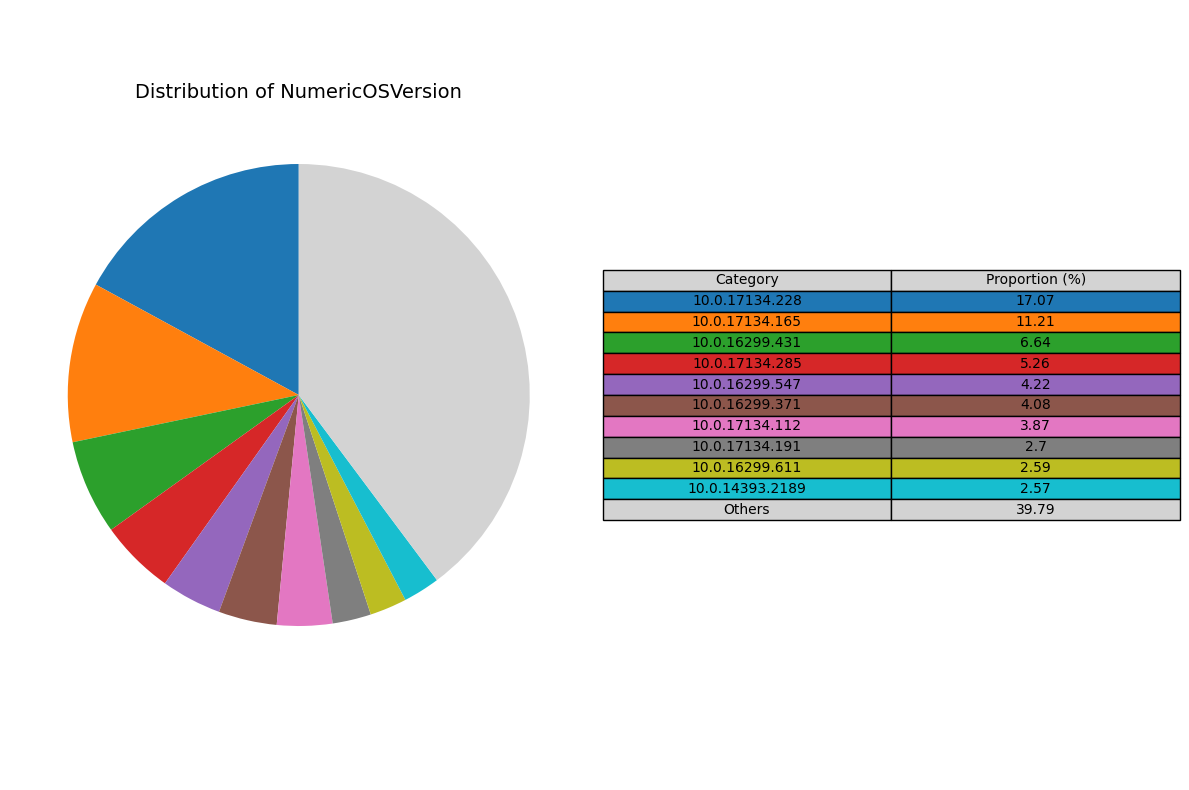

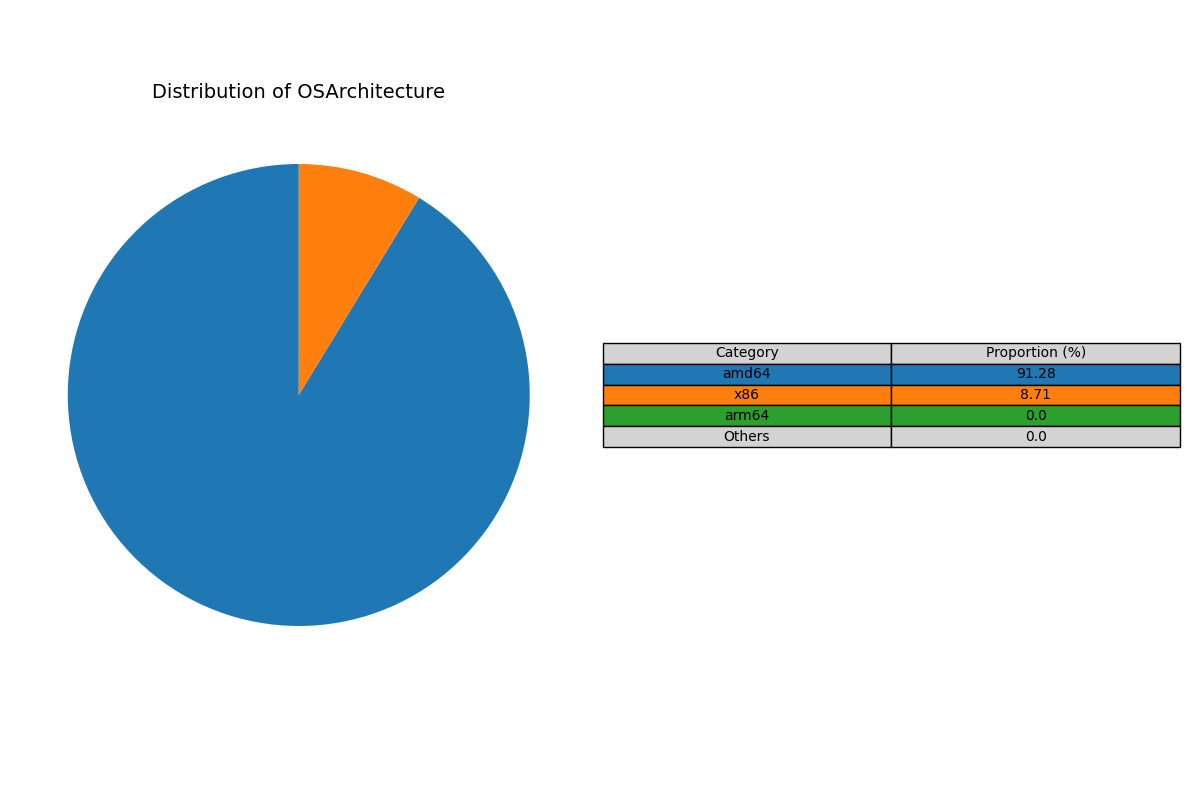

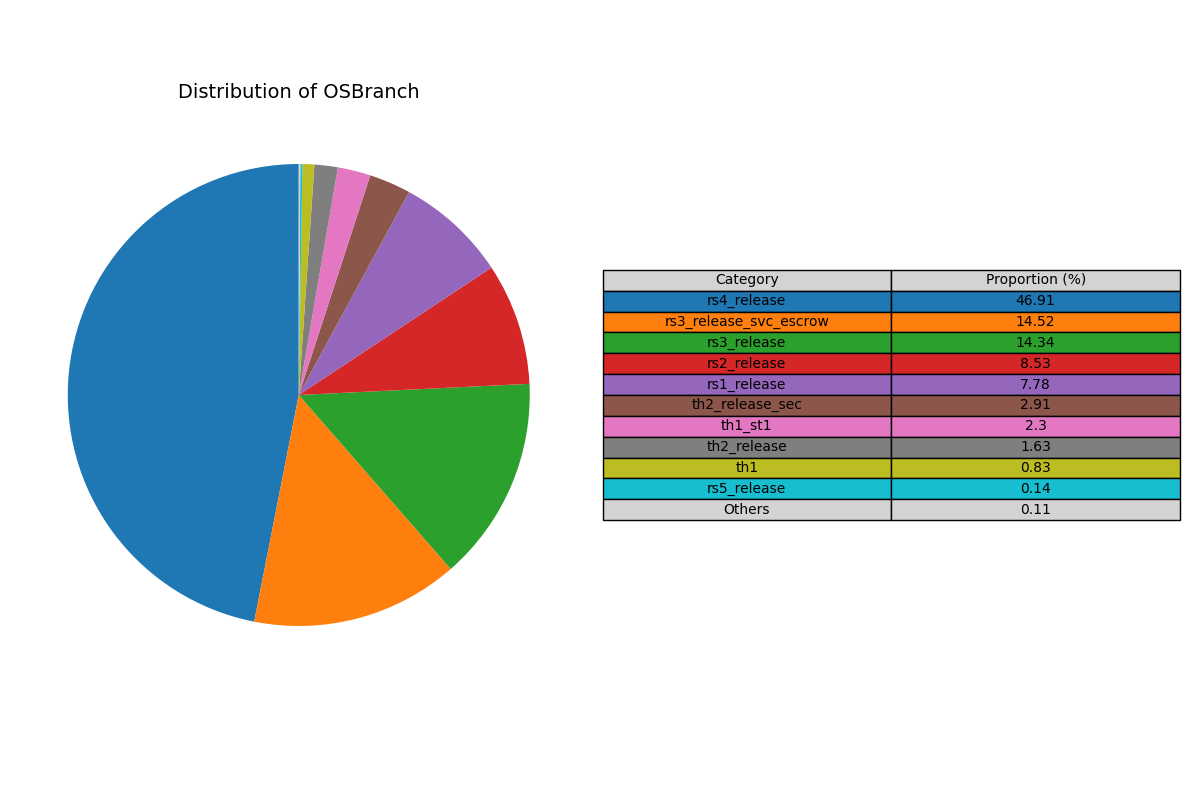

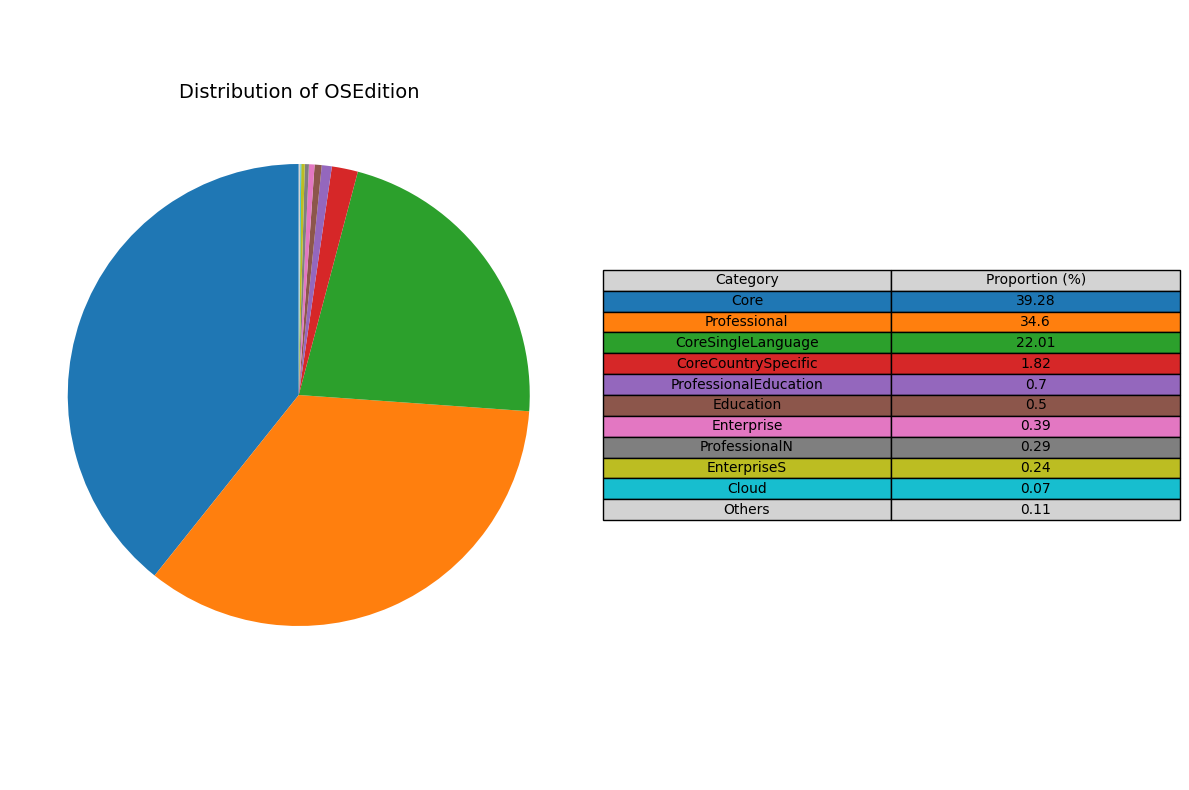

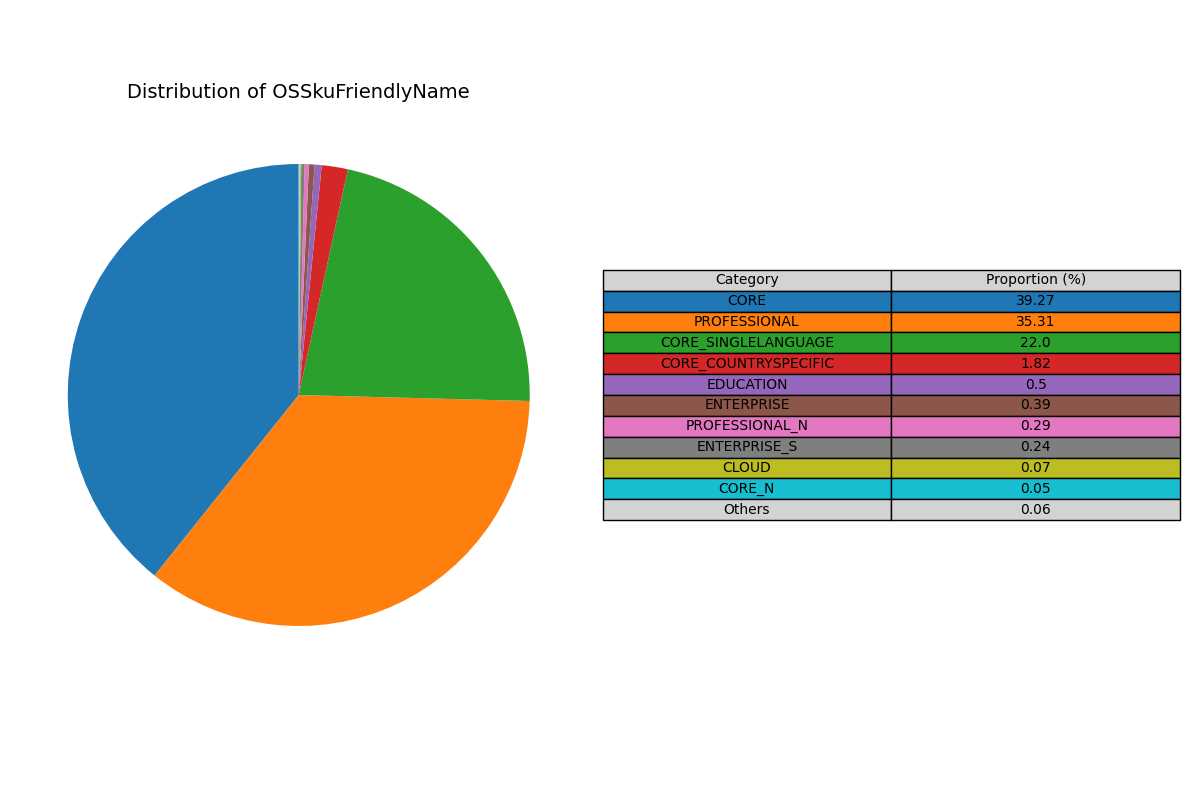

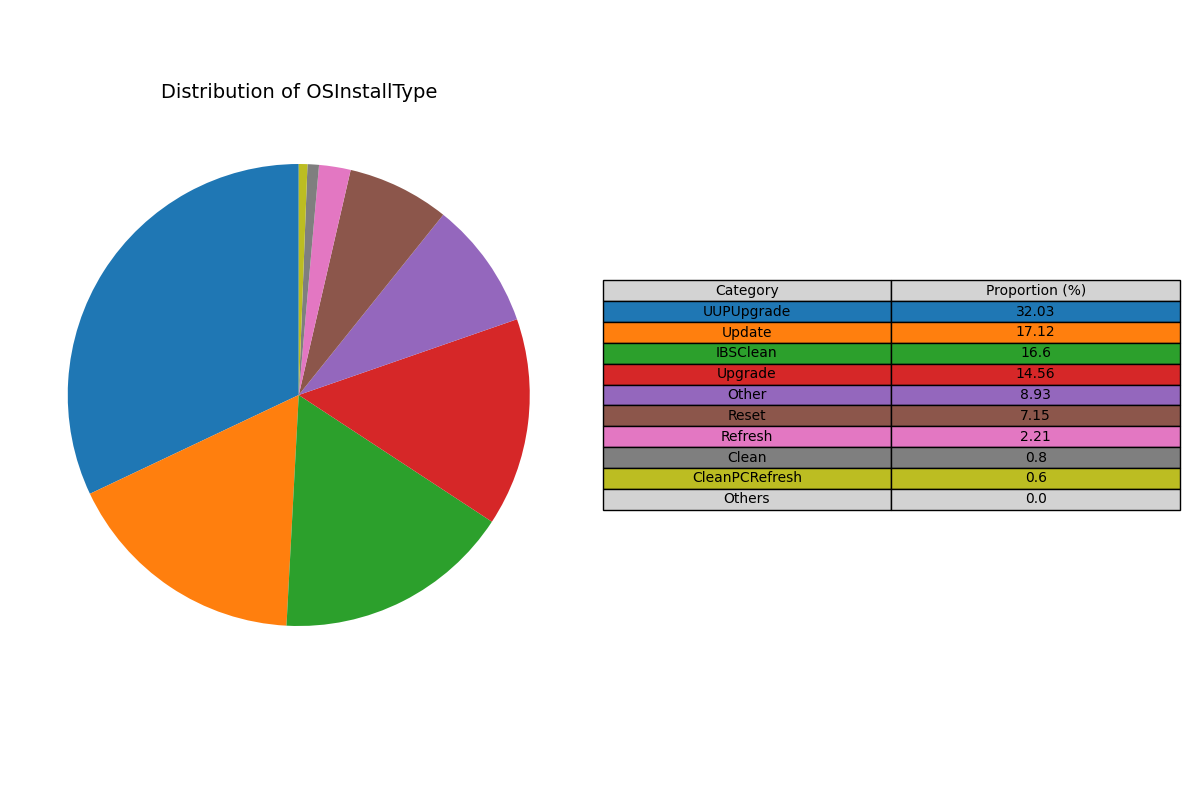

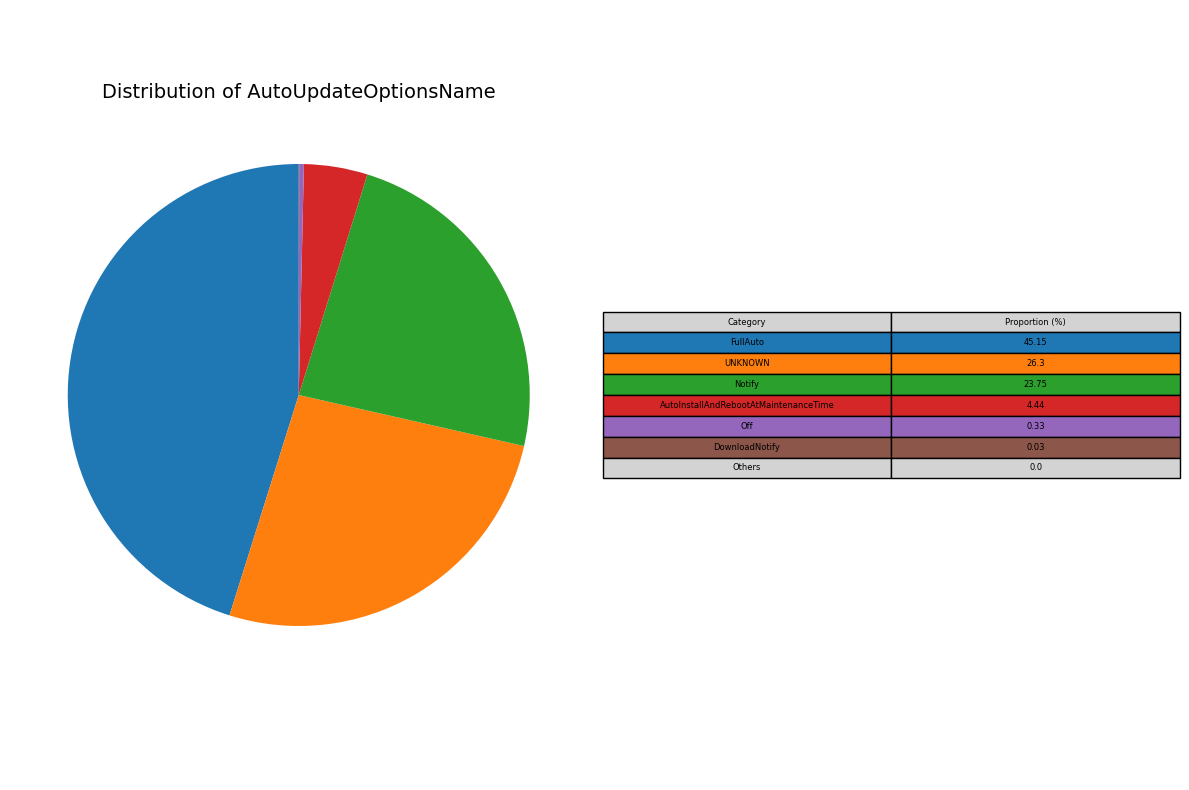

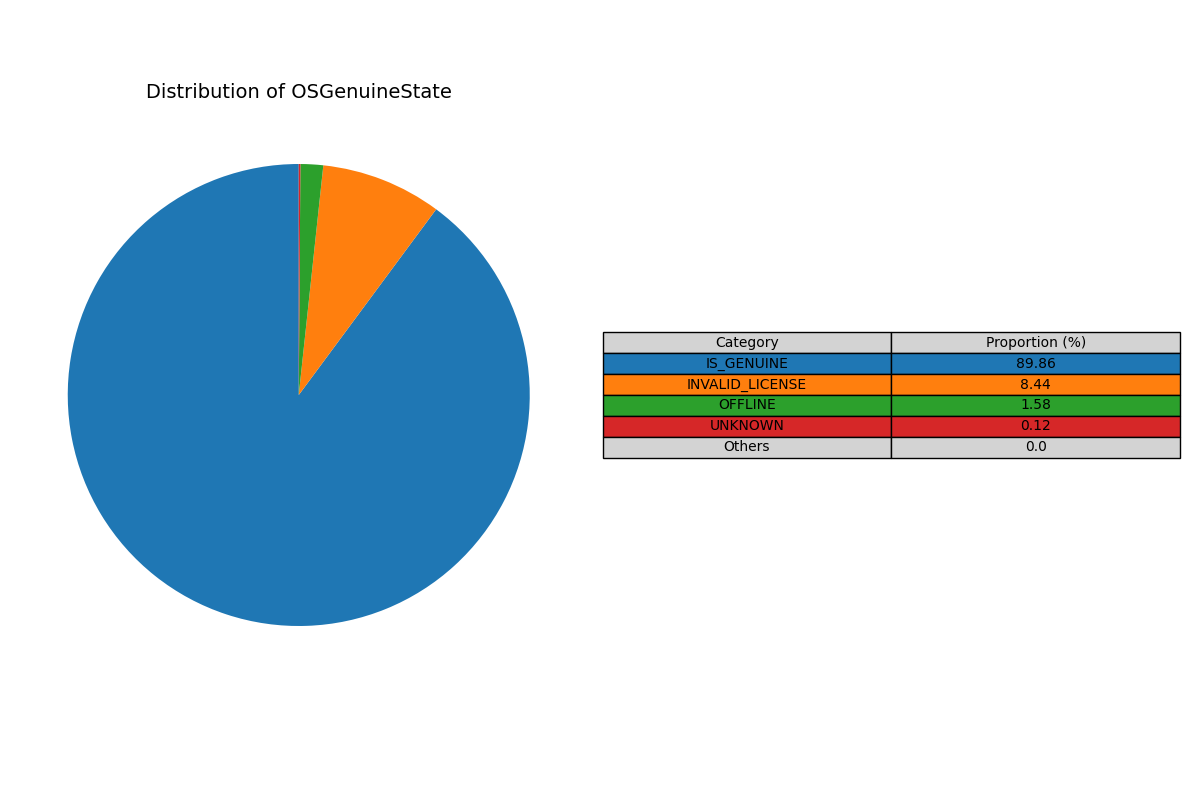

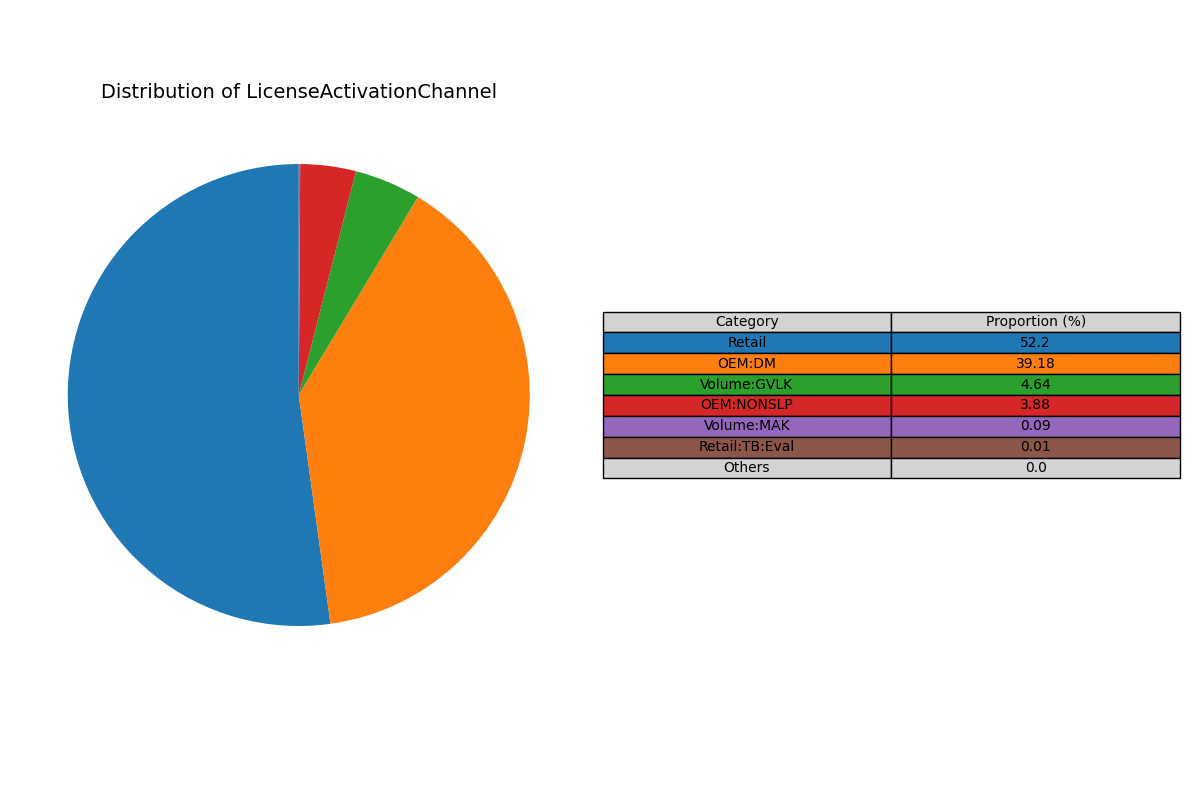

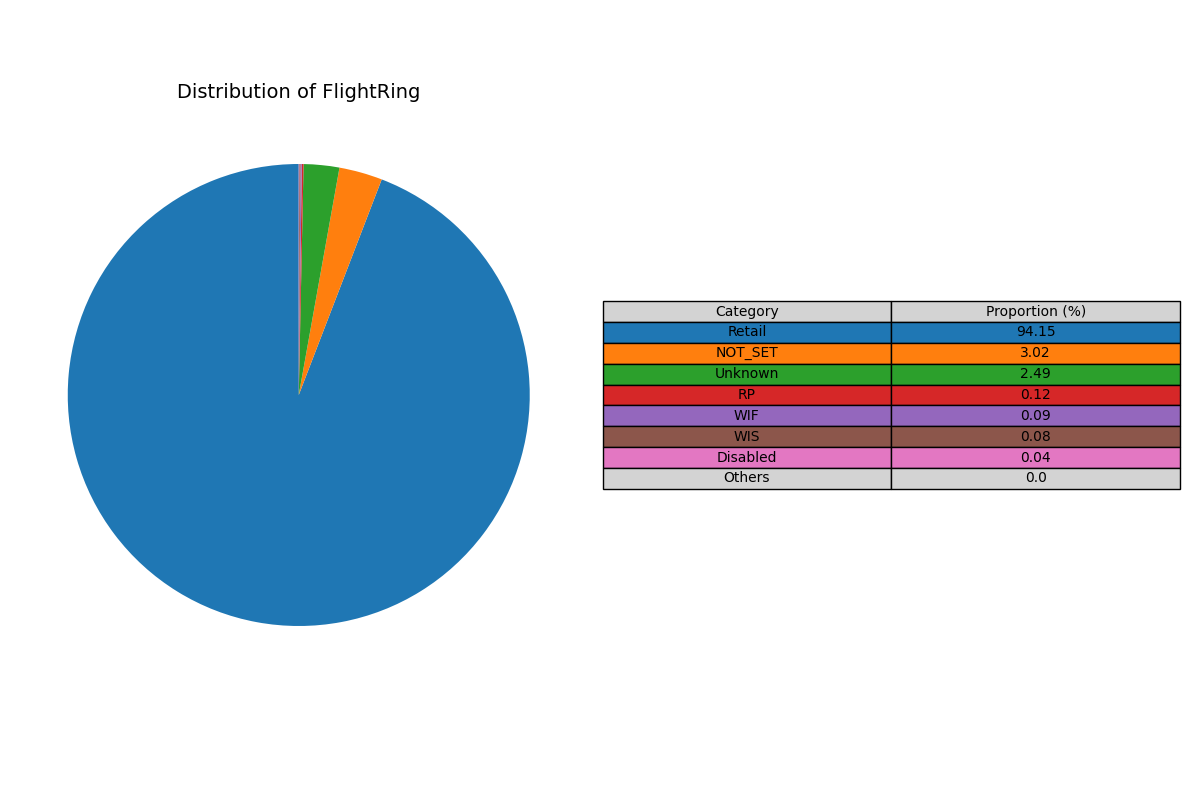

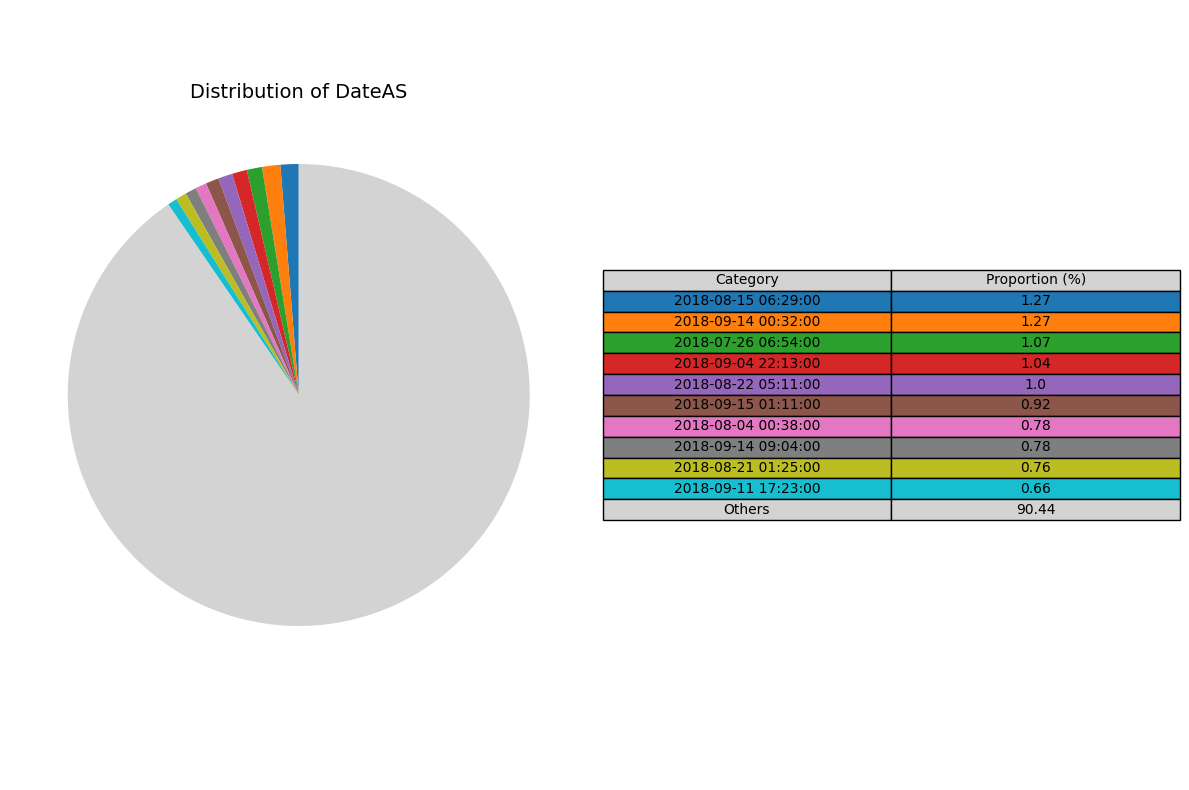

In [14]:
filtered_categorical_features = [col for col in categorical_cols if X[col].notnull().all() and X[col].value_counts(normalize=True).std().round(5) != 0.00000]

for feature in filtered_categorical_features:
    plt.figure(figsize=(12, 8))  
    
    value_counts = X[feature].value_counts(normalize=True)  
    top_10_values = value_counts.head(10)
    others_count = value_counts.iloc[10:].sum()
    
    pie_data = pd.concat([top_10_values, pd.Series({'Others': others_count})])
    
    colors = list(plt.cm.tab10.colors[:len(top_10_values)]) + ['#d3d3d3']
    plt.subplot(1, 2, 1) 
    pie_data.plot(
        kind='pie',
        startangle=90,
        colors=colors,
        labels=None,
        legend=False 
    )
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.ylabel('') 
    
    
    plt.subplot(1, 2, 2)
    table_data = pd.DataFrame({
        'Category': pie_data.index,
        'Proportion (%)': (pie_data * 100).round(2),
    })
    plt.axis('off')  
    
    cell_colors = [[color] * len(table_data.columns) for color in colors]
    plt.table(
        cellText=table_data.values,
        colLabels=table_data.columns,
        cellLoc='center',
        loc='center',
        cellColours=cell_colors,
        colColours=['lightgrey'] * len(table_data.columns)
    )
    
    plt.tight_layout()
    plt.show()

## Categorical Features to Drop

We are dropping features which internal standard deviation is 0 or correlation with target is less than 0.01

In [15]:
categorical_drop_cols = [col for col in categorical_cols if cat_col_std_dev[col] == 0.00000 or cramers_v_values[col] < 0.01]
columns_to_drop.extend(categorical_drop_cols)
print(columns_to_drop)

['IsBetaUser', 'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'AutoSampleSubmissionEnabled', 'EnableLUA', 'OEMModelID', 'ProcessorManufacturerID', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'IsPortableOS', 'IsFlightsDisabled', 'FirmwareVersionID', 'IsSecureBootEnabled', 'MachineID', 'ProductName', 'PlatformType', 'OSVersion', 'DeviceFamily', 'FlightRing']


## Data Cleaning

In [16]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA


class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(columns=self.columns_to_drop)

drop_columns_pipeline = Pipeline(steps=[
    ('drop_columns', ColumnDropper(columns_to_drop))
])

X_cleaned = drop_columns_pipeline.fit_transform(X)
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   EngineVersion                       100000 non-null  object 
 1   AppVersion                          100000 non-null  object 
 2   SignatureVersion                    100000 non-null  object 
 3   RealTimeProtectionState             99934 non-null   float64
 4   IsPassiveModeEnabled                100000 non-null  int64  
 5   AntivirusConfigID                   99924 non-null   float64
 6   NumAntivirusProductsInstalled       99924 non-null   float64
 7   NumAntivirusProductsEnabled         99924 non-null   float64
 8   LocaleEnglishNameID                 100000 non-null  int64  
 9   Processor                           100000 non-null  object 
 10  OSBuildNumber                       100000 non-null  int64  
 11  OSProductSuite             

## Preprocessing and Feature Engineering

In [17]:
numerical_cols = X_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_cleaned.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

preprocess_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_feature_engineered = preprocess_pipeline.fit_transform(X_cleaned)

print(pd.DataFrame(X_feature_engineered).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  float64
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  float64
 12  12      100000 non-null  float64
 13  13      100000 non-null  float64
 14  14      100000 non-null  float64
 15  15      100000 non-null  float64
 16  16      100000 non-null  float64
 17  17      100000 non-null  float64
 18  18      100000 non-null  float64
 19  19      100000 non-null  float64
 20  20      100000 non-null  float64
 21  21      100

## Dimensionality Reduction and Train-Test Split

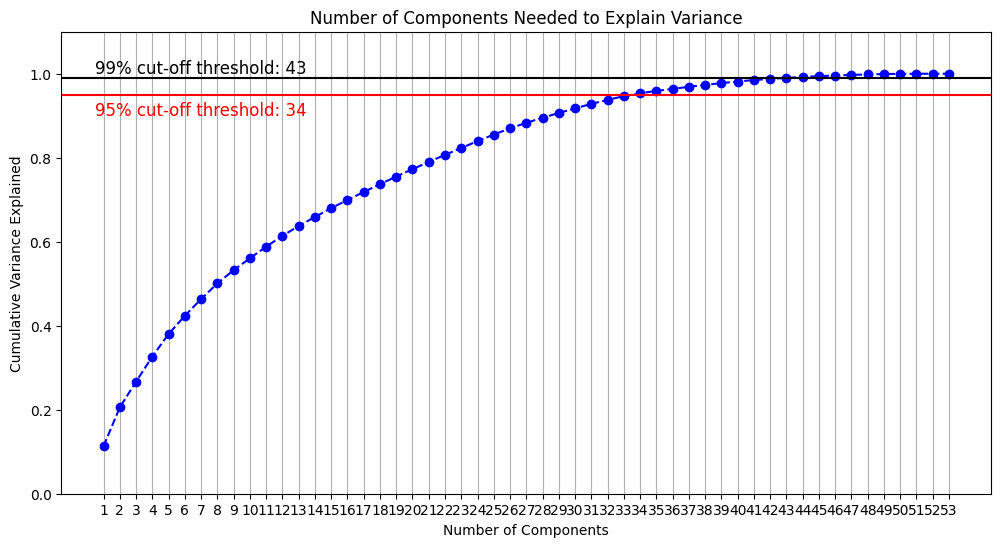

In [18]:
pca = PCA().fit(X_feature_engineered)

plt.rcParams["figure.figsize"] = (12, 6)

fig, ax = plt.subplots()
xi = np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1)  
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1))  
plt.ylabel('Cumulative Variance Explained')
plt.title('Number of Components Needed to Explain Variance')

n_components_95 = np.argmax(yi >= 0.95) + 1 
n_components_99 = np.argmax(yi >= 0.99) + 1

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.90, f'95% cut-off threshold: {n_components_95}', color='red', fontsize=12)

plt.axhline(y=0.99, color='k', linestyle='-')
plt.text(0.5, 1.00, f'99% cut-off threshold: {n_components_99}', color='black', fontsize=12)

ax.grid(axis='x')
plt.show()

In [19]:
dimensionality_reduction_pipeline = Pipeline(steps=[
    ('pca', PCA(n_components=43))
])

X_preprocessed = dimensionality_reduction_pipeline.fit_transform(X_feature_engineered)

print(pd.DataFrame(X_preprocessed).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  float64
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  float64
 12  12      100000 non-null  float64
 13  13      100000 non-null  float64
 14  14      100000 non-null  float64
 15  15      100000 non-null  float64
 16  16      100000 non-null  float64
 17  17      100000 non-null  float64
 18  18      100000 non-null  float64
 19  19      100000 non-null  float64
 20  20      100000 non-null  float64
 21  21      100

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 43)
X_test shape: (20000, 43)
y_train shape: (80000,)
y_test shape: (20000,)


## Model Training and Inference

In [21]:

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, 
    roc_curve, precision_recall_curve, auc
)

def model_pipeline(model):
    return Pipeline([
        ('classifier', model) 
    ])

# Train multiple models
pipelines = {
    "baseline": model_pipeline(LogisticRegression(max_iter=1000, random_state=42)),
    "SGD": model_pipeline(SGDClassifier(max_iter=500, warm_start=True, random_state=42)),
    'ada_classifier':  model_pipeline(AdaBoostClassifier(n_estimators=10, learning_rate=10, random_state=42)),
    'dt_classifier': model_pipeline(DecisionTreeClassifier(random_state=42)),
    "Naive Bayes": model_pipeline(GaussianNB()),
    "KNN": model_pipeline(KNeighborsClassifier(n_neighbors=5)),
    "Random Forest": model_pipeline(RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)),
    "Gradient Boosting": model_pipeline(GradientBoostingClassifier(n_estimators=50, random_state=42)),
}

In [22]:
metrics = {}
for name, model in pipelines.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
        
    try:
        y_proba = model.predict_proba(X_test)[:, 1] 
    except:
        y_proba = y_pred 
    
    metrics[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'predictions': y_pred,
        'probabilities': y_proba
    }
    print(f"{name} Accuracy: {metrics[name]['accuracy']:.4f}")
    print(f"{name} Precision: {metrics[name]['precision']:.4f}")
    print(f"{name} Recall: {metrics[name]['recall']:.4f}")
    print(f"{name} F1 Score: {metrics[name]['f1']:.4f}")

Training baseline...
baseline Accuracy: 0.5934
baseline Precision: 0.5843
baseline Recall: 0.6815
baseline F1 Score: 0.6291
Training SGD...
SGD Accuracy: 0.5847
SGD Precision: 0.5720
SGD Recall: 0.7120
SGD F1 Score: 0.6344
Training ada_classifier...
ada_classifier Accuracy: 0.5062
ada_classifier Precision: 0.5062
ada_classifier Recall: 1.0000
ada_classifier F1 Score: 0.6721
Training dt_classifier...
dt_classifier Accuracy: 0.5263
dt_classifier Precision: 0.5326
dt_classifier Recall: 0.5240
dt_classifier F1 Score: 0.5283
Training Naive Bayes...
Naive Bayes Accuracy: 0.5628
Naive Bayes Precision: 0.5477
Naive Bayes Recall: 0.7815
Naive Bayes F1 Score: 0.6440
Training KNN...
KNN Accuracy: 0.5623
KNN Precision: 0.5629
KNN Recall: 0.6039
KNN F1 Score: 0.5827
Training Random Forest...
Random Forest Accuracy: 0.5907
Random Forest Precision: 0.5968
Random Forest Recall: 0.5897
Random Forest F1 Score: 0.5932
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.5994
Gradient Boosting Prec

In [23]:
def plot_confusion_matrices(models, metrics, y_test):
    fig, axes = plt.subplots(1, len(models), figsize=(15, 5))
    if len(models) == 1:
        axes = [axes]
        
    for i, (name, model) in enumerate(models.items()):
        cm = confusion_matrix(y_test, metrics[name]['predictions'])
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
        axes[i].set_title(f'{name}')
        axes[i].set_xlabel('Predicted label')
        axes[i].set_ylabel('True label')
    
    plt.tight_layout()
    plt.show()

def plot_roc_curves(metrics, y_test):
    plt.figure(figsize=(10, 8))
    for name, model_metrics in metrics.items():
        fpr, tpr, _ = roc_curve(y_test, model_metrics['probabilities'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

def plot_precision_recall_curves(metrics, y_test):
    plt.figure(figsize=(10, 8))
    for name, model_metrics in metrics.items():
        precision, recall, _ = precision_recall_curve(y_test, model_metrics['probabilities'])
        plt.plot(recall, precision, label=f'{name} (Avg Precision = {np.mean(precision):.3f})')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc="best")
    plt.grid(alpha=0.3)
    plt.show()

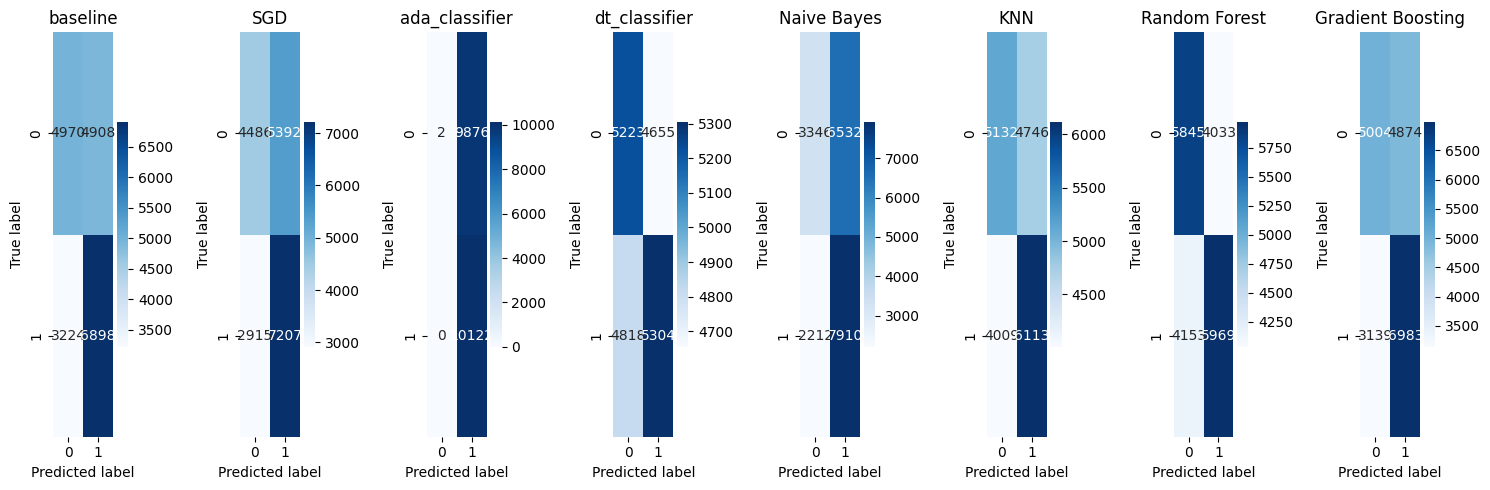

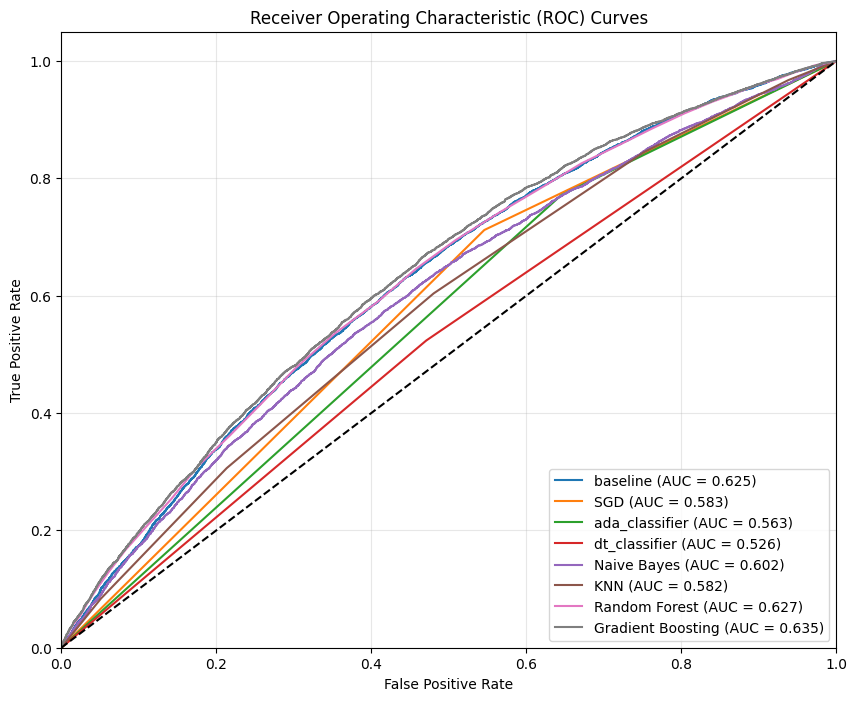

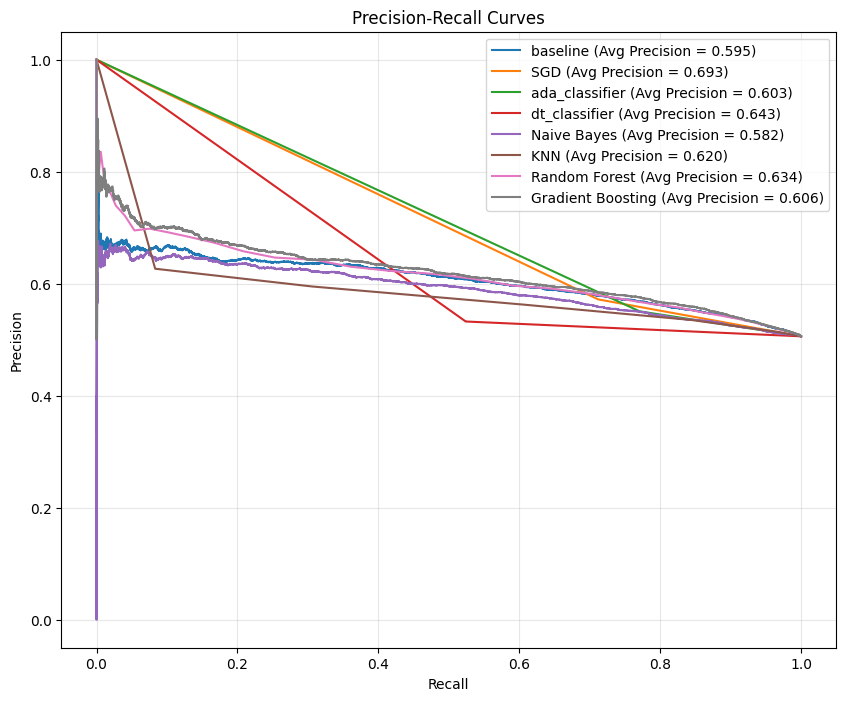

In [24]:
plot_confusion_matrices(pipelines, metrics, y_test)
plot_roc_curves(metrics, y_test)
plot_precision_recall_curves(metrics, y_test)

# Final Submission

In [25]:
test_df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           10000 non-null  object 
 1   ProductName                         10000 non-null  object 
 2   EngineVersion                       10000 non-null  object 
 3   AppVersion                          10000 non-null  object 
 4   SignatureVersion                    10000 non-null  object 
 5   IsBetaUser                          10000 non-null  int64  
 6   RealTimeProtectionState             9991 non-null   float64
 7   IsPassiveModeEnabled                10000 non-null  int64  
 8   AntivirusConfigID                   9998 non-null   float64
 9   NumAntivirusProductsInstalled       9998 non-null   float64
 10  NumAntivirusProductsEnabled         9998 non-null   float64
 11  HasTpm                              10000 

In [26]:
model = pipelines["Gradient Boosting"]

X_test_cleaned = drop_columns_pipeline.fit_transform(test_df)

numerical_cols = X_test_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_test_cleaned.select_dtypes(include=['object']).columns


X_test_feature_engineered = preprocess_pipeline.fit_transform(X_test_cleaned)
X_test_preprocessed = dimensionality_reduction_pipeline.fit_transform(X_test_feature_engineered)
y_pred=model.predict(X_test_preprocessed)

submission = pd.DataFrame({"id": range(0,test_df.shape[0]), 
                           "target": y_pred}) 

submission.to_csv('submission.csv',index=False)